In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iiitb2020-home-credit-default-risk/sample_submission.csv
/kaggle/input/iiitb2020-home-credit-default-risk/bureau_balance.csv
/kaggle/input/iiitb2020-home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/iiitb2020-home-credit-default-risk/application_train.csv
/kaggle/input/iiitb2020-home-credit-default-risk/application_test.csv
/kaggle/input/iiitb2020-home-credit-default-risk/previous_application.csv
/kaggle/input/iiitb2020-home-credit-default-risk/credit_card_balance.csv
/kaggle/input/iiitb2020-home-credit-default-risk/installments_payments.csv
/kaggle/input/iiitb2020-home-credit-default-risk/bureau.csv
/kaggle/input/gbfile/gb_hyper_1000_001_6.csv


In [2]:
import matplotlib.pyplot as plt
import gc

In [3]:
# sample = pd.read_csv('/kaggle/input/iiitb2020-home-credit-default-risk/sample_submission.csv')a

In [4]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [5]:
# nan_data = {}

In [6]:
def RemoveNaN(df,nan_data):
    cols = list(df.columns[df.isnull().sum() != 0])

    print("==========List of Columns which has Nan entries in it===========")
    print(cols,end="\n\n")

    print("========Name_of_Column number_of_NaN_values percentage_of_NaN_value=====\n ========unique_values_of_that_columns======"\
          ,end="\n\n")
    for col in cols:
        print(col,end=" ")
        print(df[col].isna().sum(),end=" ")
        print(df[col].isna().sum()/df.shape[0]*100,end="\n")
        if(len(df[col].unique())<100):
            print(df[col].unique())
        else:
            print(col+" has more than 100 unique values")
#         replace_string = input("Give the <<Type>> <<Value to replace>> type is one of the following- int or string\n")
#         nan_data[col] = []
        tokens=0
        if(type(nan_data[col]) is list):    
            tokens=nan_data[col][1]
        else:
            tokens = nan_data[col]
        replace_type = tokens
#         if(replace_type.lower() == "int"):
#             replace_value = tokens[1]
#             df[col].fillna(int(replace_value),inplace=True)
#         elif(replace_type.lower() == "string"):
#             replace_value = tokens[1]
#             df[col].fillna(replace_value,inplace=True)
        if(replace_type == "mean"):
            df[col].fillna(df[col].mean(),inplace=True)
#             nan_data[col].append(df[col].mean())
        elif(replace_type == "min"):
            df[col].fillna(df[col].min(),inplace=True)
#             nan_data[col].append(df[col].min())
        elif(replace_type == "max"):
            df[col].fillna(df[col].max(),inplace=True)
#             nan_data[col].append(df[col].max())
        elif(replace_type == "std"):
            df[col].fillna(df[col].std(),inplace=True)
#             nan_data[col].append(df[col].std())
        elif(replace_type == "most"):
            df[col].fillna(df[col].value_counts().idxmax(),inplace=True)
#             nan_data[col].append(df[col].value_counts().idxmax())
        elif(replace_type == "median"):
            df[col].fillna(df[col].median(),inplace=True)
#             nan_data[col].append(df[col].median())
        else:
            df[col].fillna(replace_type,inplace=True)
#             nan_data[col].append(replace_type)
        print()
#     check_NaN(df)
    print(nan_data)

In [7]:
def merge(df,parent_df,key,method):
    for col in df:
        print(col)
        if col == key:
            continue
        if col not in method:
            print(col)
            if(len(df[col].unique())<100):
                print(df[col].unique())
#             ipt = input()
#             ipt = ipt.split(" ")
#             method[col] = [ ipt[0], float(ipt[1])]
            method[col] = ['sum', 0.0]
        fn = method[col][0]
        val = method[col][1]
        if(fn == "ignore"):
            continue
        if(fn == "mode"):
            mf = df.groupby(key)[col].agg(lambda x: pd.Series.mode(x)[0]).reindex(parent_df[key].unique(), fill_value=val)
            parent_df = parent_df.join(mf,on=key,lsuffix='_1', rsuffix='_2')
            continue
        if(fn == "mean"):
            mf = df.groupby(key)[col].agg('mean').reindex(parent_df[key].unique(), fill_value=val)
            parent_df = parent_df.join(mf,on=key,lsuffix='_1', rsuffix='_2')
            continue
        mf = df.groupby(key)[col].agg(eval(fn)).reindex(parent_df[key].unique(), fill_value=val)
        parent_df = parent_df.join(mf,on=key,lsuffix='_1', rsuffix='_2')
    return parent_df

# bureau part

In [8]:
bureau = pd.read_csv('/kaggle/input/iiitb2020-home-credit-default-risk/bureau.csv')

In [9]:
bureau_nan = {'DAYS_CREDIT_ENDDATE':0, 'DAYS_ENDDATE_FACT':0, 'AMT_CREDIT_MAX_OVERDUE':0, 'AMT_CREDIT_SUM':0, 'AMT_CREDIT_SUM_DEBT':0, 'AMT_CREDIT_SUM_LIMIT':0, 'AMT_ANNUITY':0}

In [10]:
RemoveNaN(bureau,bureau_nan)

==========List of Columns which has Nan entries in it===========
['DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_ANNUITY']

========Name_of_Column number_of_NaN_values percentage_of_NaN_value=====
 ========unique_values_of_that_columns======

DAYS_CREDIT_ENDDATE 105553 6.149573416420613
DAYS_CREDIT_ENDDATE has more than 100 unique values

DAYS_ENDDATE_FACT 633653 36.916957775100386
DAYS_ENDDATE_FACT has more than 100 unique values

AMT_CREDIT_MAX_OVERDUE 1124488 65.51326359159837
AMT_CREDIT_MAX_OVERDUE has more than 100 unique values

AMT_CREDIT_SUM 13 0.0007573868522303295
AMT_CREDIT_SUM has more than 100 unique values

AMT_CREDIT_SUM_DEBT 257669 15.011931755948982
AMT_CREDIT_SUM_DEBT has more than 100 unique values

AMT_CREDIT_SUM_LIMIT 591780 34.47741472406649
AMT_CREDIT_SUM_LIMIT has more than 100 unique values

AMT_ANNUITY 1226791 71.4734902949614
AMT_ANNUITY has more than 100 unique value

In [11]:
#encoding
bureau['CREDIT_TYPE'] = LabelEncoder().fit_transform(bureau['CREDIT_TYPE'])
b_Onehot = ['CREDIT_ACTIVE','CREDIT_CURRENCY']
bureau = pd.get_dummies(bureau,columns=b_Onehot,drop_first=True)

In [12]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,...,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,CREDIT_ACTIVE_Bad debt,CREDIT_ACTIVE_Closed,CREDIT_ACTIVE_Sold,CREDIT_CURRENCY_currency 2,CREDIT_CURRENCY_currency 3,CREDIT_CURRENCY_currency 4
0,ue6oex,eoxbd6b,-1835,0,-739.0,-763.0,0.000,0,675000.0,0.0,...,0.0,3,-612,0.0,0,1,0,0,0,0
1,7bxax7,6oaorab,-904,0,-722.0,-691.0,216.945,0,31500.0,0.0,...,0.0,3,-691,0.0,0,1,0,0,0,0
2,axrrbx,d7xo7bb,-893,0,-809.0,-804.0,0.000,0,45000.0,0.0,...,0.0,10,-796,0.0,0,1,0,0,0,0
3,a7bd7r,o6drrx6,-2246,0,-420.0,-420.0,0.000,0,2700000.0,0.0,...,0.0,3,-414,0.0,0,1,0,0,0,0
4,roaexd,a66our6,-2584,0,-2218.0,-2218.0,7042.365,0,83205.0,0.0,...,0.0,3,-2218,0.0,0,1,0,0,0,0


# bureau_bal part

In [13]:
bureau_bal = pd.read_csv('/kaggle/input/iiitb2020-home-credit-default-risk/bureau_balance.csv')

In [14]:
bureau_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    object
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(1), object(2)
memory usage: 624.8+ MB


In [15]:
bureau_bal.sample()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
27218712,6xdoxeb,-57,X


In [16]:
bb_Onehot = ['STATUS']
bureau_bal = pd.get_dummies(bureau_bal,columns=bb_Onehot,drop_first=True)

In [17]:
# bureau_bal.head()
# bureau_bal['STATUS'].unique()

### Merging bureau and bureau_bal

In [18]:
# bureau bal to bureau
bb_merge = {'MONTHS_BALANCE': ['min',0.0],
 'STATUS_1': ['sum', 0.0],
 'STATUS_2': ['sum', 0.0],
 'STATUS_3': ['sum', 0.0],
 'STATUS_4': ['sum', 0.0],
 'STATUS_5': ['sum', 0.0],
 'STATUS_C': ['sum', 0.0],
 'STATUS_X': ['sum', 0.0]}
bureau = merge(bureau_bal,bureau,'SK_ID_BUREAU',bb_merge)

SK_ID_BUREAU
MONTHS_BALANCE
STATUS_1
STATUS_2
STATUS_3
STATUS_4
STATUS_5
STATUS_C
STATUS_X


In [19]:
# bureau.head()
del bureau_bal
gc.collect()

165

# Cash_bal part

In [20]:
cash_bal = pd.read_csv('/kaggle/input/iiitb2020-home-credit-default-risk/POS_CASH_balance.csv')

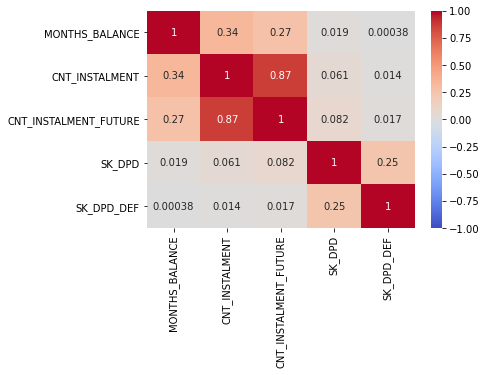

In [21]:
sns.heatmap(cash_bal.corr().abs(),vmin=-1,cmap='coolwarm',annot=True)

In [22]:
cash_bal.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,6a6uarx,ox6uar,-21,60.0,56.0,Active,0,0
1,uerooox,ouaa6x,-44,10.0,3.0,Active,0,0
2,oe7e66d,ud6aa7,-79,5.0,1.0,Active,0,0
3,6rbdrxd,o7eer7,-6,48.0,26.0,Active,0,0
4,76ede7x,xo7r6d,-24,18.0,14.0,Active,6,6


In [23]:
cash_bal_drop = ['CNT_INSTALMENT_FUTURE']
cash_bal.drop(columns = cash_bal_drop,axis=1,inplace = True)

In [24]:
cash_bal['SK_ID_PREV'].describe()

count     10001358
unique      936325
top        7bd6r7d
freq            96
Name: SK_ID_PREV, dtype: object

In [25]:
cash_bal.isna().sum()

SK_ID_PREV                  0
SK_ID_CURR                  0
MONTHS_BALANCE              0
CNT_INSTALMENT          26071
NAME_CONTRACT_STATUS        0
SK_DPD                      0
SK_DPD_DEF                  0
dtype: int64

In [26]:
cash_bal['CNT_INSTALMENT'].value_counts()

12.0    2496845
24.0    1517472
10.0    1243449
6.0     1065500
18.0     727394
         ...   
63.0          2
70.0          2
92.0          1
68.0          1
81.0          1
Name: CNT_INSTALMENT, Length: 73, dtype: int64

In [27]:
cash_bal_nan = {'CNT_INSTALMENT': 'median'}

In [28]:
RemoveNaN(cash_bal,cash_bal_nan)

==========List of Columns which has Nan entries in it===========
['CNT_INSTALMENT']

========Name_of_Column number_of_NaN_values percentage_of_NaN_value=====
 ========unique_values_of_that_columns======

CNT_INSTALMENT 26071 0.26067460038926715
[60. 10.  5. 48. 18. 24. 12.  6. 36.  8. 13. 14. 42.  9. 11.  4. 15. 21.
  3. 25. nan 30. 20. 35.  1.  7. 54.  2. 17. 16. 23. 19. 41. 34. 37. 43.
 44. 61. 32. 45. 22. 40. 31. 33. 72. 27. 49. 29. 26. 53. 38. 28. 47. 46.
 39. 59. 84. 55. 66. 51. 63. 52. 50. 58. 57. 56. 70. 77. 62. 68. 64. 71.
 81. 92.]

{'CNT_INSTALMENT': 'median'}


In [29]:
cash_bal.isna().sum()

SK_ID_PREV              0
SK_ID_CURR              0
MONTHS_BALANCE          0
CNT_INSTALMENT          0
NAME_CONTRACT_STATUS    0
SK_DPD                  0
SK_DPD_DEF              0
dtype: int64

In [30]:
cb_Onehot = ['NAME_CONTRACT_STATUS']
cash_bal = pd.get_dummies(cash_bal,columns=cb_Onehot,drop_first=True)

# Previous application

In [31]:
prev_app = pd.read_csv('/kaggle/input/iiitb2020-home-credit-default-risk/previous_application.csv')

In [32]:
prev_app.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [33]:
upper = prev_app.corr().abs().where(np.triu(np.ones(prev_app.corr().shape), k=1).astype(np.bool))
to_drop_prev_app = [column for column in upper.columns if any(upper[column] >= 0.90)]
prev_app.drop(columns =to_drop_prev_app,axis=1,inplace = True)

In [34]:
prev_app.drop(columns=['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'],inplace=True)

In [35]:
prev_app_nan = {"AMT_ANNUITY":0,"AMT_DOWN_PAYMENT":0,"AMT_GOODS_PRICE":0,"RATE_DOWN_PAYMENT":0,"NAME_TYPE_SUITE":"most",
               "CNT_PAYMENT":0,"PRODUCT_COMBINATION":"most","DAYS_FIRST_DRAWING":"most","DAYS_FIRST_DUE":"most","DAYS_LAST_DUE_1ST_VERSION":"most",
               "DAYS_LAST_DUE":"most","NFLAG_INSURED_ON_APPROVAL":0}

In [36]:
RemoveNaN(prev_app,prev_app_nan)

==========List of Columns which has Nan entries in it===========
['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'NAME_TYPE_SUITE', 'CNT_PAYMENT', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'NFLAG_INSURED_ON_APPROVAL']

========Name_of_Column number_of_NaN_values percentage_of_NaN_value=====
 ========unique_values_of_that_columns======

AMT_ANNUITY 372235 22.286665062081866
AMT_ANNUITY has more than 100 unique values

AMT_DOWN_PAYMENT 895844 53.636480115721696
AMT_DOWN_PAYMENT has more than 100 unique values

RATE_DOWN_PAYMENT 895844 53.636480115721696
RATE_DOWN_PAYMENT has more than 100 unique values

NAME_TYPE_SUITE 820405 49.11975351661524
['Unaccompanied' 'Family' nan 'Spouse, partner' 'Children' 'Other_A'
 'Other_B' 'Group of people']

CNT_PAYMENT 372230 22.286365699245724
[24. 12. nan  6.  8. 42. 30.  0. 60. 18.  4. 36. 16. 14.  5. 48. 10. 54.
  3. 15. 20.  9. 72.  7. 84. 11. 29. 13. 26. 66. 28. 41. 21. 32

In [37]:
# ADD encoding
categor_prev_app = [i for i in prev_app.columns if prev_app[i].dtypes == 'object']
categor_prev_app

['SK_ID_PREV',
 'SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [38]:
prev_app['PRODUCT_COMBINATION'].value_counts()

Cash                              286336
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [39]:
labelencoder = LabelEncoder()
Label_prev_app = ['FLAG_LAST_APPL_PER_CONTRACT','NAME_CONTRACT_STATUS','NAME_CASH_LOAN_PURPOSE','CODE_REJECT_REASON','NAME_CLIENT_TYPE',
        'NAME_GOODS_CATEGORY','NAME_PORTFOLIO']
for i in Label_prev_app:
    prev_app[i] = labelencoder.fit_transform(prev_app[i])

In [40]:
temp_label = ['NAME_SELLER_INDUSTRY','CHANNEL_TYPE','PRODUCT_COMBINATION']
for i in temp_label:
    prev_app[i] = labelencoder.fit_transform(prev_app[i])

In [41]:
Ambigious_prev_App = ['NAME_SELLER_INDUSTRY','CHANNEL_TYPE','NAME_YIELD_GROUP','PRODUCT_COMBINATION']

In [42]:
Onehot_prev_app = ['WEEKDAY_APPR_PROCESS_START','NAME_PAYMENT_TYPE','NAME_TYPE_SUITE']
prev_app = pd.get_dummies(prev_app,columns=Onehot_prev_app,drop_first=True)

In [43]:
temp_onehot = ['NAME_CONTRACT_TYPE','NAME_PRODUCT_TYPE','NAME_YIELD_GROUP']
prev_app = pd.get_dummies(prev_app,columns=temp_onehot,drop_first=True)

In [44]:
# temp2 = ['WEEKDAY_APPR_PROCESS_START']

### Merging cash_bal and prev_app

In [45]:
cp_merge={'SK_ID_CURR': ['ignore', 0.0],
 'MONTHS_BALANCE': ['min', 0.0],
 'CNT_INSTALMENT': ['max', 0.0],
 'SK_DPD': ['sum', 0.0],
 'SK_DPD_DEF': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Amortized debt': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Approved': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Canceled': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Completed': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Demand': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Returned to the store': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Signed': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_XNA': ['sum', 0.0]}
prev_app = merge(cash_bal,prev_app,'SK_ID_PREV',cp_merge)

SK_ID_PREV
SK_ID_CURR
MONTHS_BALANCE
CNT_INSTALMENT
SK_DPD
SK_DPD_DEF
NAME_CONTRACT_STATUS_Amortized debt
NAME_CONTRACT_STATUS_Approved
NAME_CONTRACT_STATUS_Canceled
NAME_CONTRACT_STATUS_Completed
NAME_CONTRACT_STATUS_Demand
NAME_CONTRACT_STATUS_Returned to the store
NAME_CONTRACT_STATUS_Signed
NAME_CONTRACT_STATUS_XNA


In [46]:
# cp_merge
del cash_bal
gc.collect()

20

In [47]:
# prev_app.head()

# installment part


In [48]:
installment = pd.read_csv('/kaggle/input/iiitb2020-home-credit-default-risk/installments_payments.csv')

In [49]:
installment_nan = {"DAYS_ENTRY_PAYMENT":0,"AMT_PAYMENT":0}
RemoveNaN(installment,installment_nan)

==========List of Columns which has Nan entries in it===========
['DAYS_ENTRY_PAYMENT', 'AMT_PAYMENT']

========Name_of_Column number_of_NaN_values percentage_of_NaN_value=====
 ========unique_values_of_that_columns======

DAYS_ENTRY_PAYMENT 2905 0.02135181462126695
DAYS_ENTRY_PAYMENT has more than 100 unique values

AMT_PAYMENT 2905 0.02135181462126695
AMT_PAYMENT has more than 100 unique values

{'DAYS_ENTRY_PAYMENT': 0, 'AMT_PAYMENT': 0}


In [50]:
installment['penalty_days']=installment['DAYS_ENTRY_PAYMENT']-installment['DAYS_INSTALMENT']
installment['penalty_amount']=installment['AMT_PAYMENT']-installment['AMT_INSTALMENT']

In [51]:
installment.drop(columns=['DAYS_ENTRY_PAYMENT','DAYS_INSTALMENT','AMT_PAYMENT','AMT_INSTALMENT'],inplace=True)
# upper = prev_app.corr().abs().where(np.triu(np.ones(prev_app.corr().shape), k=1).astype(np.bool))
# to_drop_prev_app = [column for column in upper.columns if any(upper[column] >= 0.90)]
# prev_app.drop(columns =to_drop_prev_app,axis=1,inplace = True)

In [52]:
installment.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,penalty_days,penalty_amount
0,xaruuad,bru6rr,3.0,13,-1.0,0.0
1,ea77d7d,e6ed67,0.0,110,0.0,0.0
2,o7eaxex,b7e6er,1.0,4,-2.0,0.0
3,xud6eed,b7ar6d,0.0,28,-5.0,0.0
4,oubddbx,7aubrx,1.0,2,-22.0,0.0


## Merging installment and prev_app

In [53]:
ip_merge = {'SK_ID_CURR': ['ignore', 0.0],
 'NUM_INSTALMENT_VERSION': ['mode', 0.0],
 'NUM_INSTALMENT_NUMBER': ['max', 0.0],
 'penalty_days': ['sum', 0.0],
 'penalty_amount': ['sum', 0.0]}
prev_app = merge(installment,prev_app,'SK_ID_PREV',ip_merge)

SK_ID_PREV
SK_ID_CURR
NUM_INSTALMENT_VERSION
NUM_INSTALMENT_NUMBER
penalty_days
penalty_amount


In [54]:
# ip_merge
del installment
gc.collect()

20

# Credit card balance part

In [55]:
 cred_bal = pd.read_csv('/kaggle/input/iiitb2020-home-credit-default-risk/credit_card_balance.csv')

In [56]:
upper = cred_bal.corr().abs().where(np.triu(np.ones(cred_bal.corr().shape), k=1).astype(np.bool))
to_drop_cred_bal = [column for column in upper.columns if any(upper[column] >= 0.90)]
cred_bal.drop(columns =to_drop_cred_bal,axis=1,inplace = True)

In [57]:
credit_bal_nan = {'AMT_DRAWINGS_ATM_CURRENT': 0, 'AMT_DRAWINGS_OTHER_CURRENT': 0, 'AMT_DRAWINGS_POS_CURRENT': 0, 'AMT_INST_MIN_REGULARITY': 0, 'AMT_PAYMENT_CURRENT': 0, 'CNT_DRAWINGS_ATM_CURRENT': 0, 'CNT_DRAWINGS_OTHER_CURRENT': 0, 'CNT_DRAWINGS_POS_CURRENT': 0, 'CNT_INSTALMENT_MATURE_CUM': 0}
RemoveNaN(cred_bal,credit_bal_nan)

==========List of Columns which has Nan entries in it===========
['AMT_DRAWINGS_ATM_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT', 'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY', 'AMT_PAYMENT_CURRENT', 'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_INSTALMENT_MATURE_CUM']

========Name_of_Column number_of_NaN_values percentage_of_NaN_value=====
 ========unique_values_of_that_columns======

AMT_DRAWINGS_ATM_CURRENT 749816 19.52487193748841
AMT_DRAWINGS_ATM_CURRENT has more than 100 unique values

AMT_DRAWINGS_OTHER_CURRENT 749816 19.52487193748841
AMT_DRAWINGS_OTHER_CURRENT has more than 100 unique values

AMT_DRAWINGS_POS_CURRENT 749816 19.52487193748841
AMT_DRAWINGS_POS_CURRENT has more than 100 unique values

AMT_INST_MIN_REGULARITY 305236 7.948208374736219
AMT_INST_MIN_REGULARITY has more than 100 unique values

AMT_PAYMENT_CURRENT 767988 19.998062657409086
AMT_PAYMENT_CURRENT has more than 100 unique values

CNT_DRAWINGS_ATM_CURRENT 749816 19.52487193748841
[ 0.  2.

In [58]:
crb_Onehot = ['NAME_CONTRACT_STATUS']
cred_bal = pd.get_dummies(cred_bal,columns=crb_Onehot,drop_first=True)

## Merging cred_bal and prev_app

In [59]:
cred_merge = {'SK_ID_CURR': ['ignore', 0.0],
 'MONTHS_BALANCE': ['min', 0.0],
 'AMT_BALANCE': ['min', 0.0],
 'AMT_CREDIT_LIMIT_ACTUAL': ['mean', 0.0],
 'AMT_DRAWINGS_ATM_CURRENT': ['mean', 0.0],
 'AMT_DRAWINGS_CURRENT': ['mean', 0.0],
 'AMT_DRAWINGS_OTHER_CURRENT': ['mean', 0.0],
 'AMT_DRAWINGS_POS_CURRENT': ['mean', 0.0],
 'AMT_INST_MIN_REGULARITY': ['mean', 0.0],
 'AMT_PAYMENT_CURRENT': ['mean', 0.0],
 'CNT_DRAWINGS_ATM_CURRENT': ['sum', 0.0],
 'CNT_DRAWINGS_CURRENT': ['sum', 0.0],
 'CNT_DRAWINGS_OTHER_CURRENT': ['sum', 0.0],
 'CNT_INSTALMENT_MATURE_CUM': ['sum', 0.0],
 'SK_DPD': ['sum', 0.0],
 'SK_DPD_DEF': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Approved': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Completed': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Demand': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Refused': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Sent proposal': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Signed': ['sum', 0.0]}
prev_app = merge(cred_bal,prev_app,'SK_ID_PREV',cred_merge)

SK_ID_PREV
SK_ID_CURR
MONTHS_BALANCE
AMT_BALANCE
AMT_CREDIT_LIMIT_ACTUAL
AMT_DRAWINGS_ATM_CURRENT
AMT_DRAWINGS_CURRENT
AMT_DRAWINGS_OTHER_CURRENT
AMT_DRAWINGS_POS_CURRENT
AMT_INST_MIN_REGULARITY
AMT_PAYMENT_CURRENT
CNT_DRAWINGS_ATM_CURRENT
CNT_DRAWINGS_CURRENT
CNT_DRAWINGS_OTHER_CURRENT
CNT_INSTALMENT_MATURE_CUM
SK_DPD
SK_DPD_DEF
NAME_CONTRACT_STATUS_Approved
NAME_CONTRACT_STATUS_Completed
NAME_CONTRACT_STATUS_Demand
NAME_CONTRACT_STATUS_Refused
NAME_CONTRACT_STATUS_Sent proposal
NAME_CONTRACT_STATUS_Signed


In [60]:
del cred_bal
gc.collect()

20

### Application train values

In [61]:
apptrain = pd.read_csv('/kaggle/input/iiitb2020-home-credit-default-risk/application_train.csv')

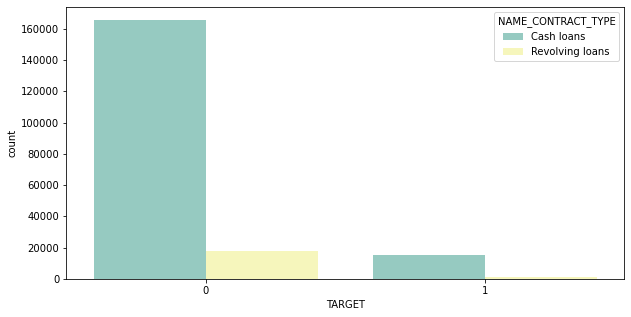

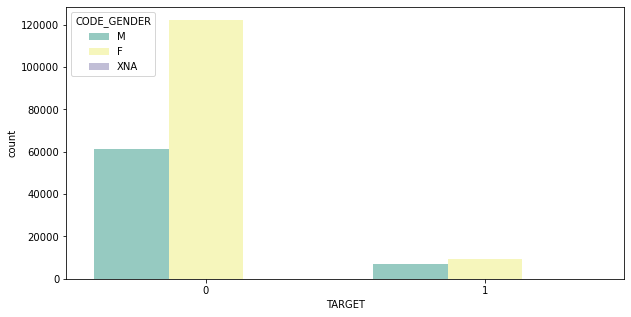

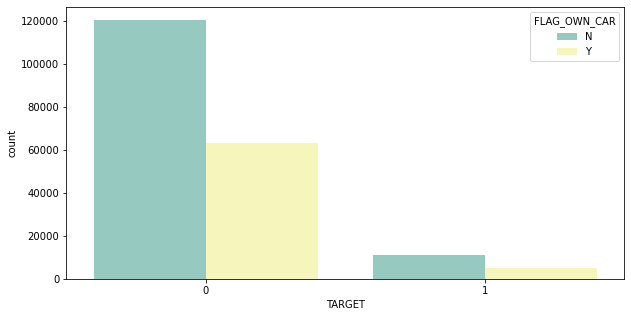

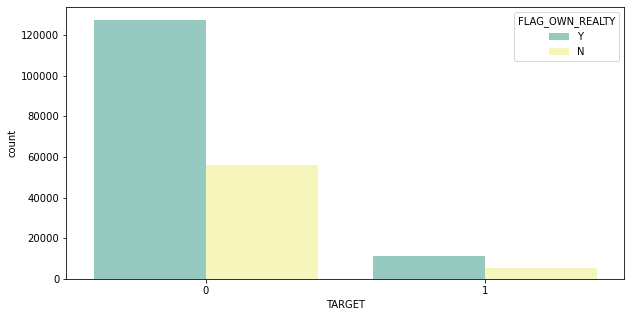

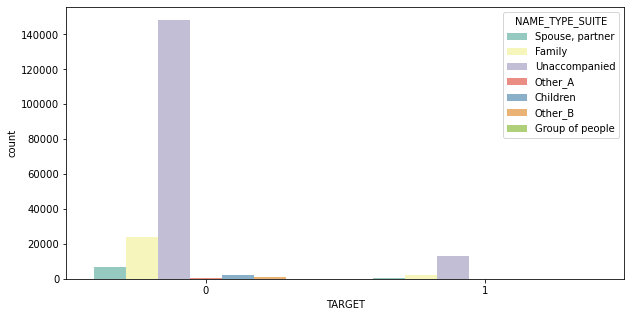

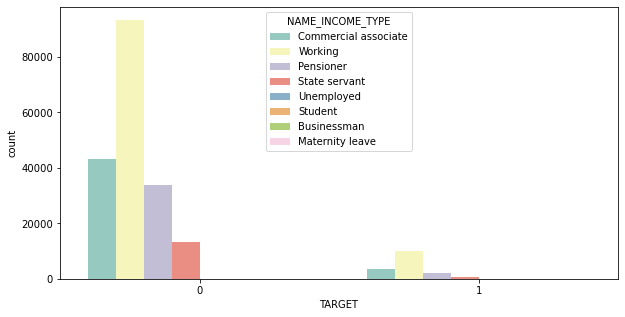

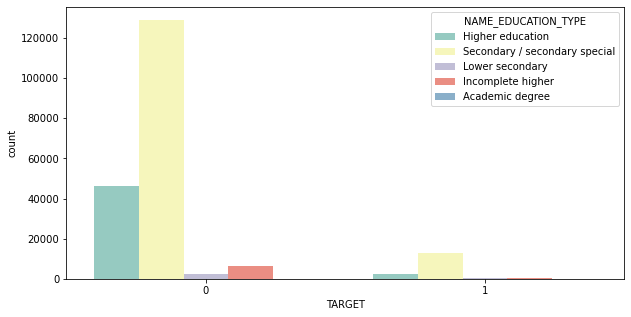

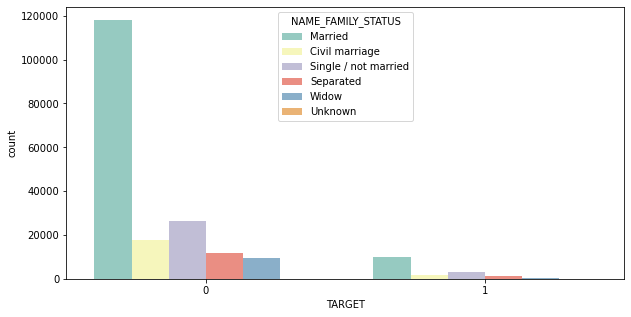

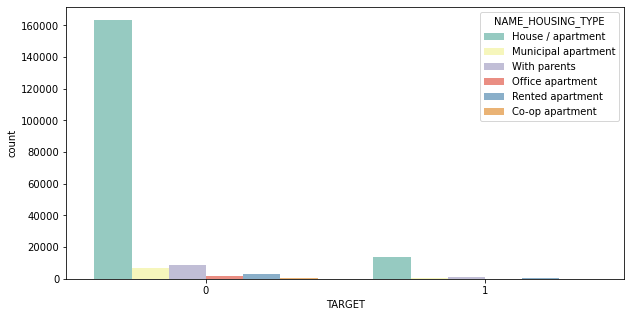

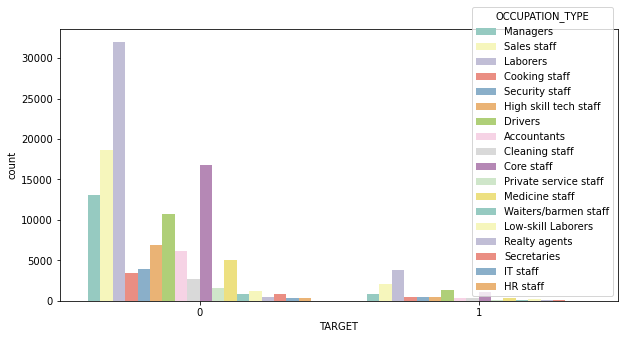

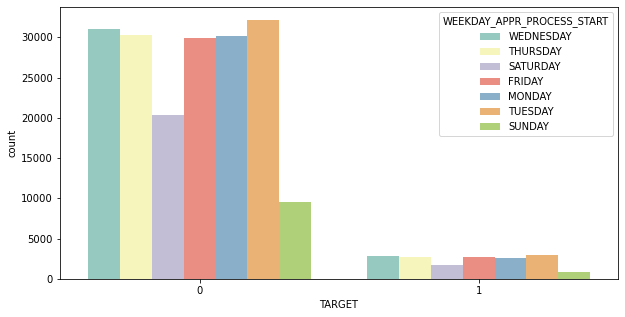

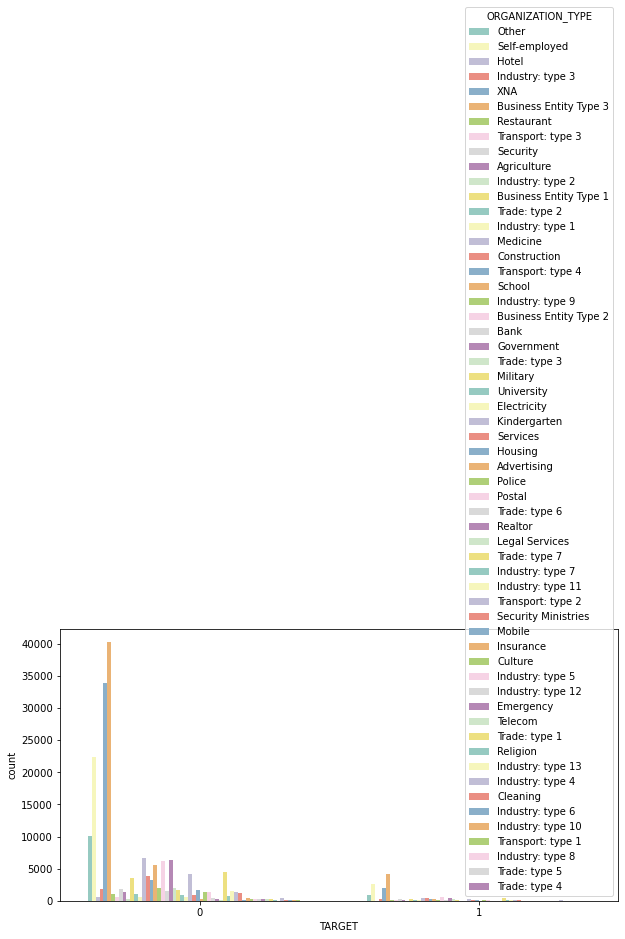

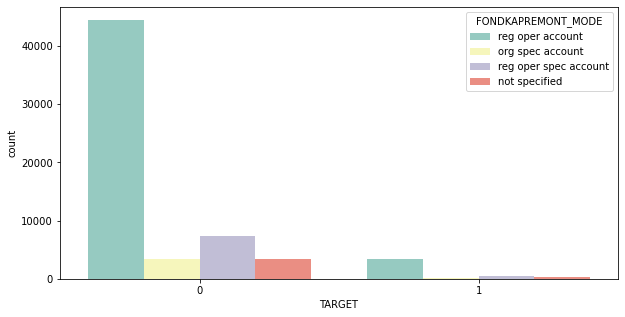

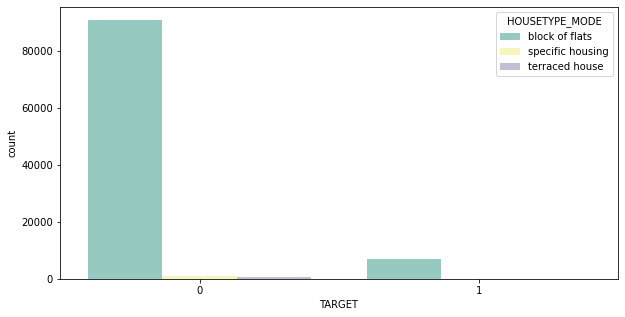

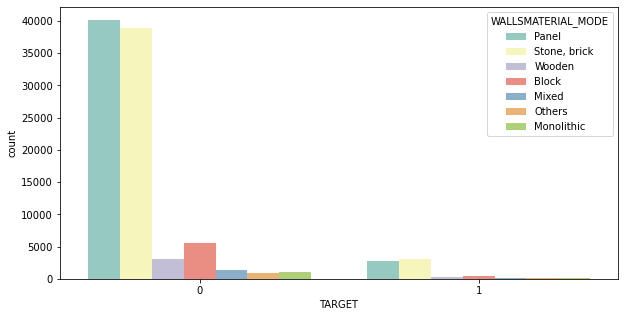

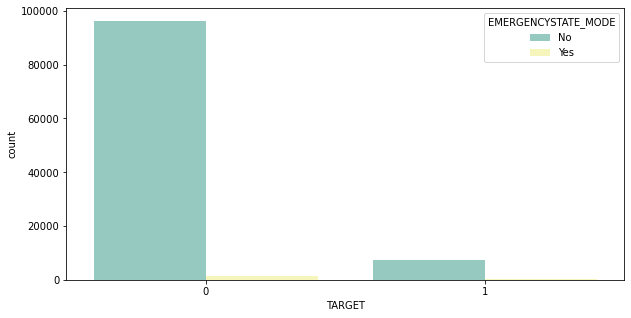

In [62]:
train=apptrain.drop(columns=['SK_ID_CURR'])
for i in train:
    if (train[i].dtype=='object'):
        plt.figure(figsize=(10,5))
        sns.countplot(data=train,x='TARGET',hue=i,palette="Set3")
        plt.show()

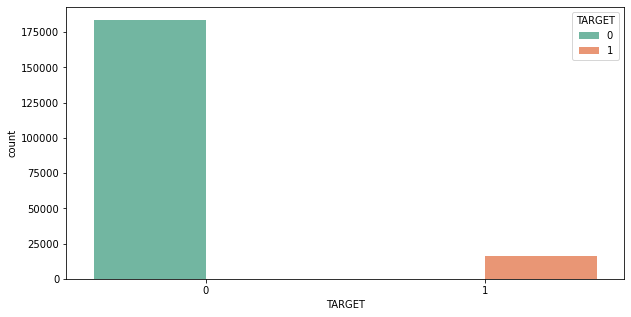

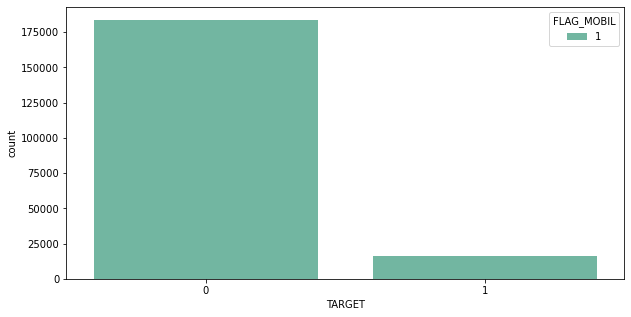

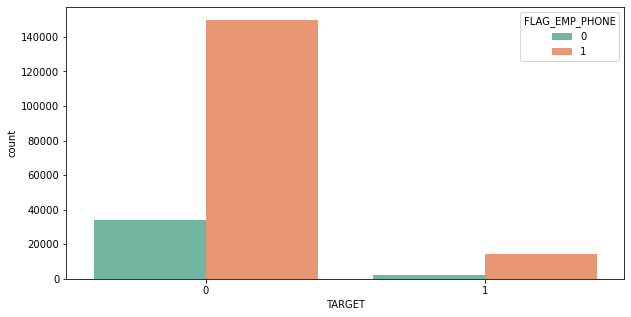

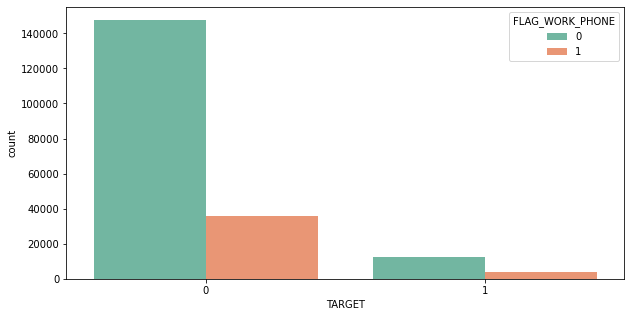

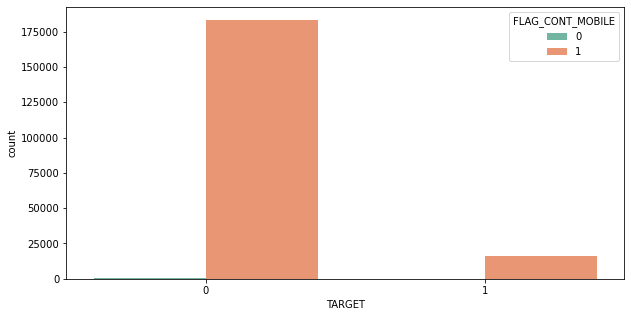

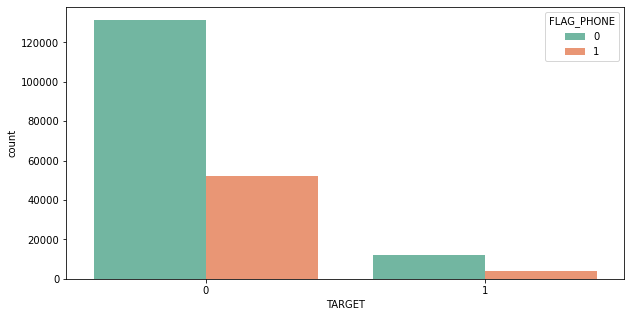

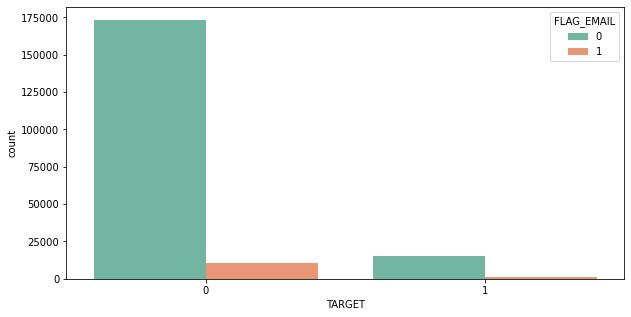

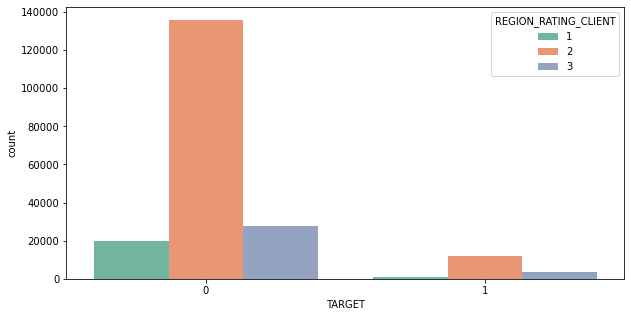

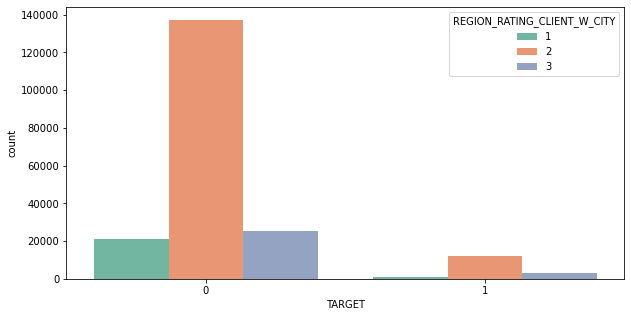

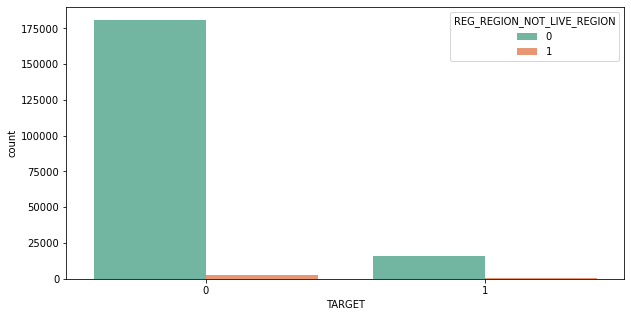

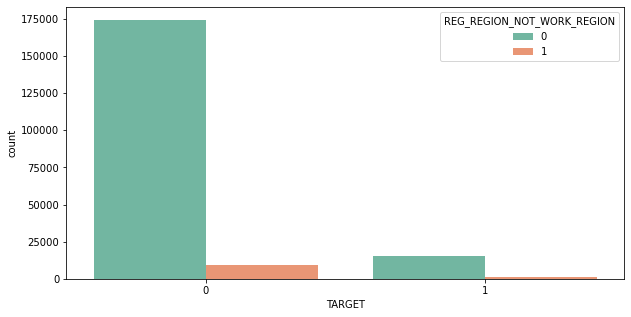

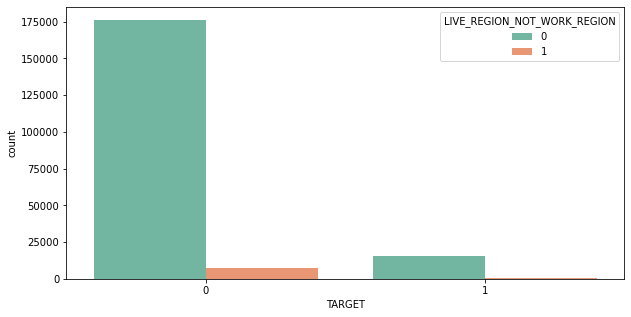

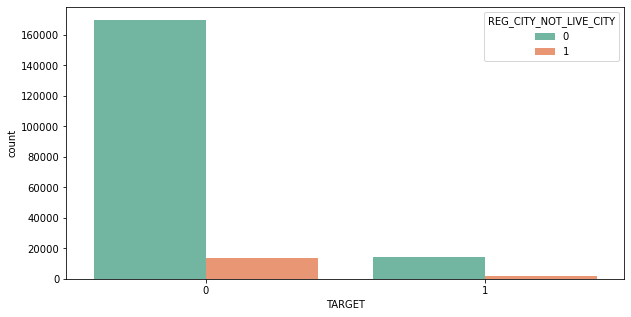

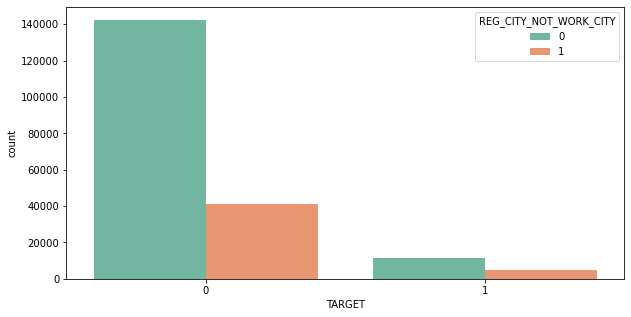

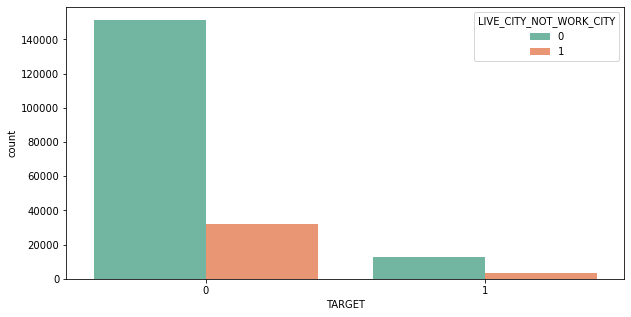

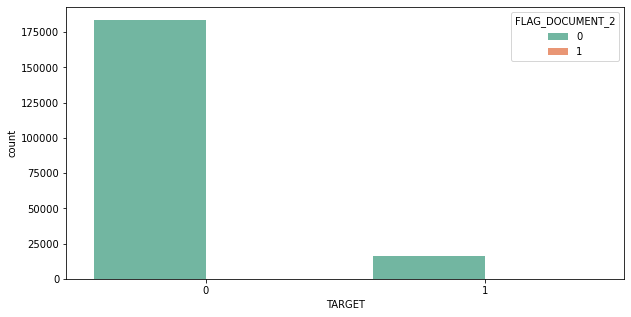

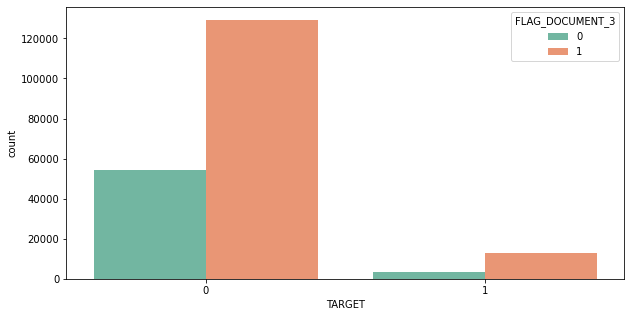

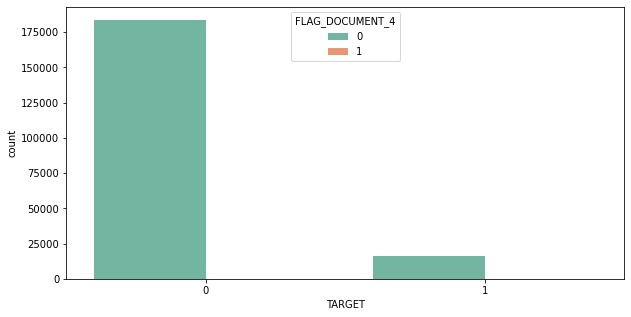

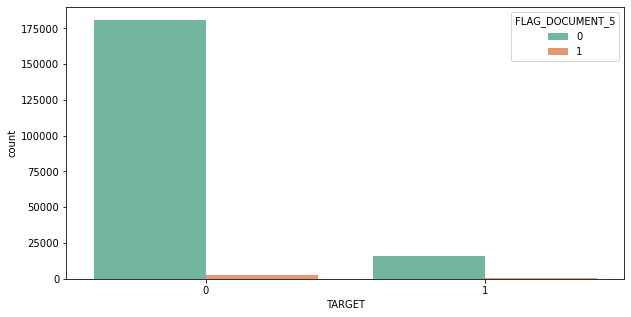

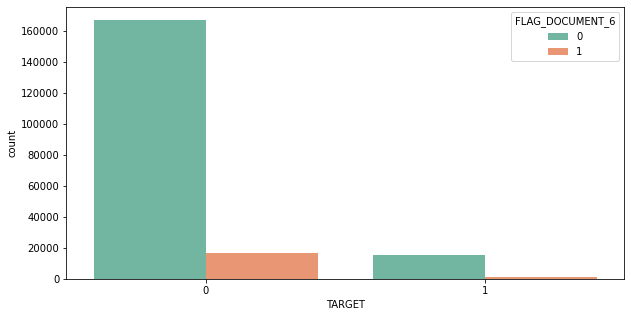

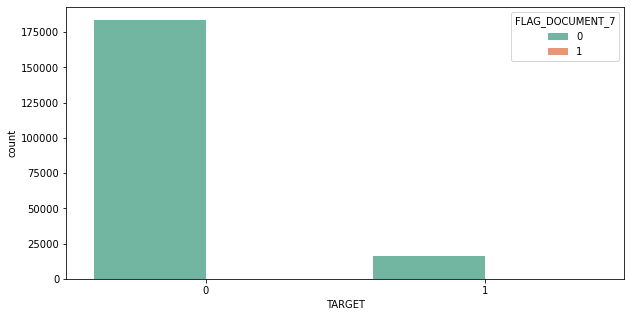

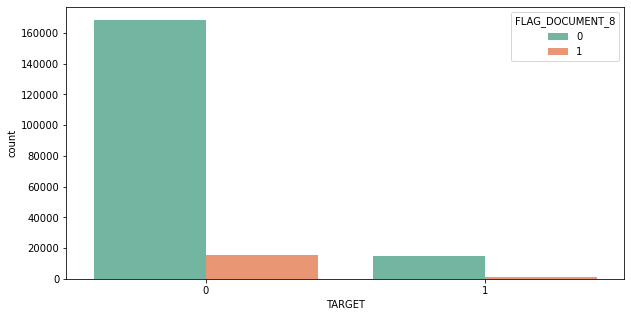

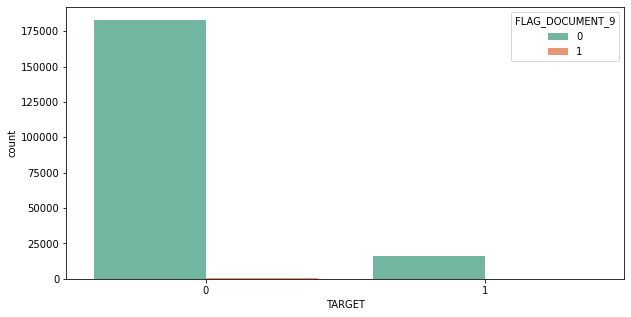

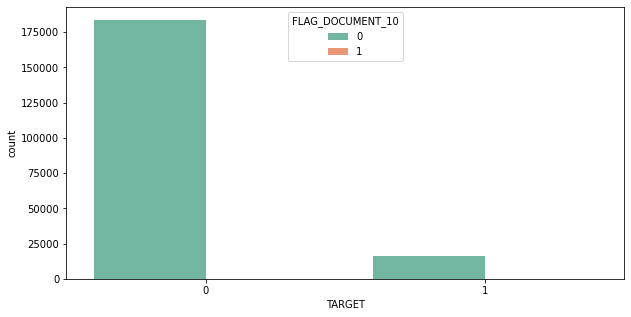

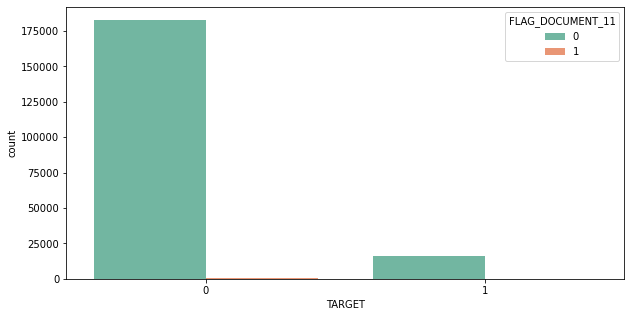

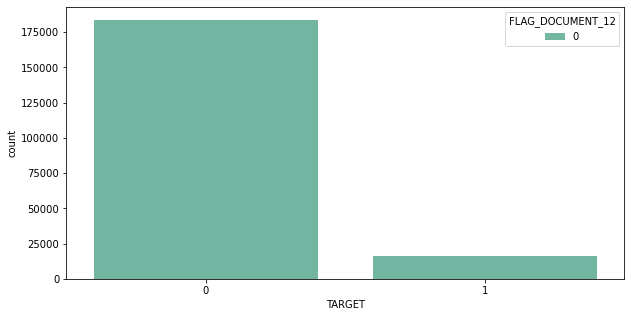

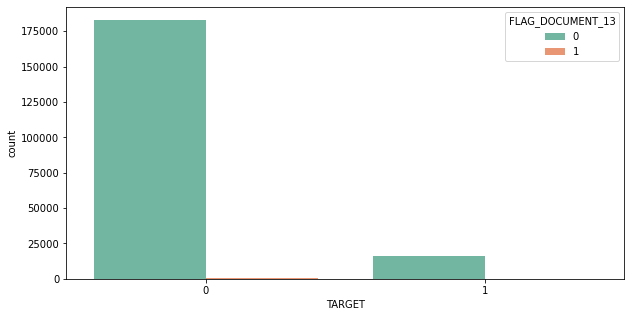

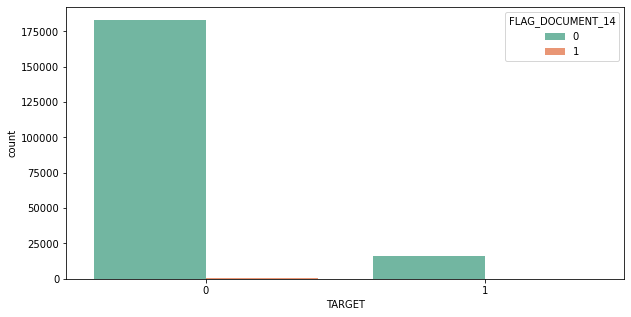

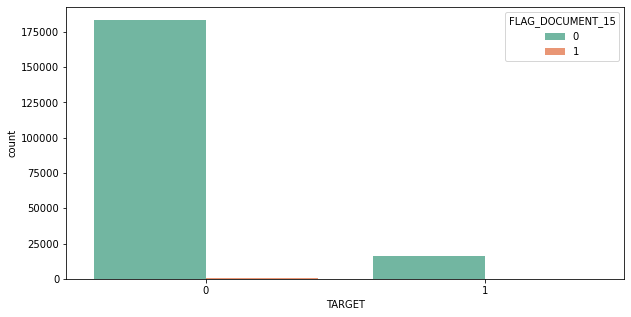

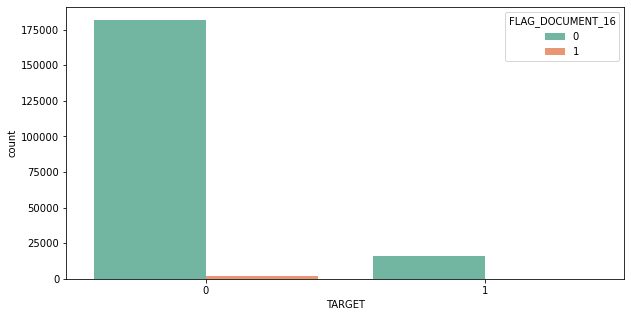

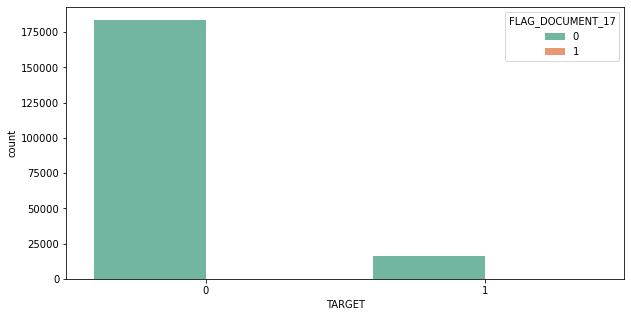

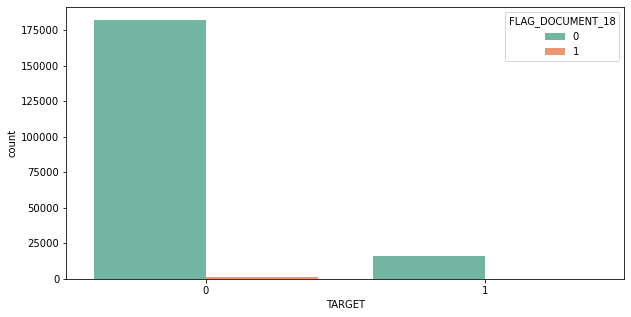

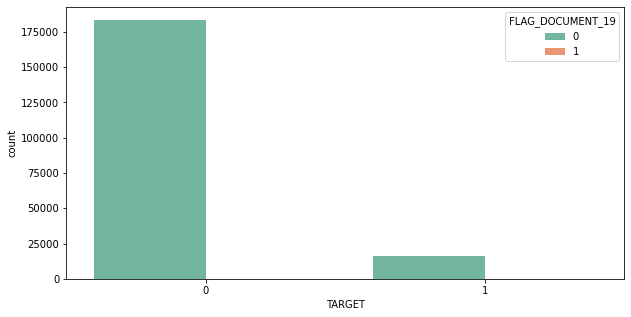

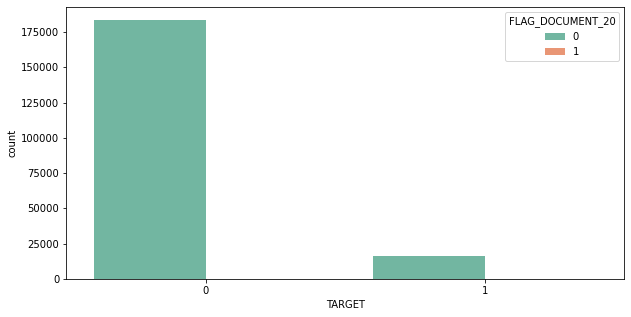

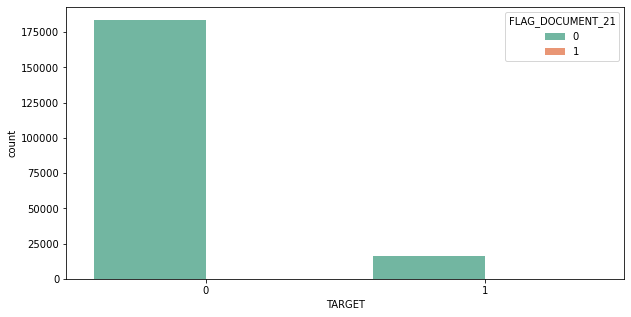

In [63]:
for i in train:
    if (len(train[i].unique())<=3 and not train[i].dtype=='object'):
        plt.figure(figsize=(10,5))
        sns.countplot(data=train,x='TARGET',hue=i,palette="Set2")
        plt.show()

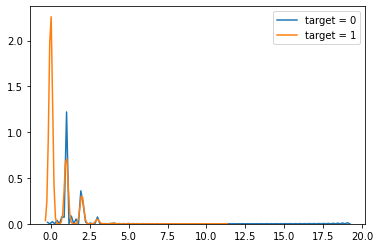

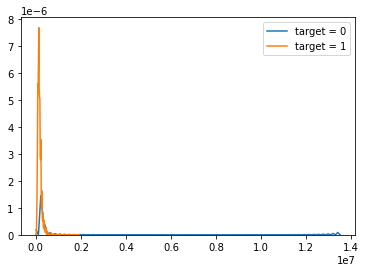

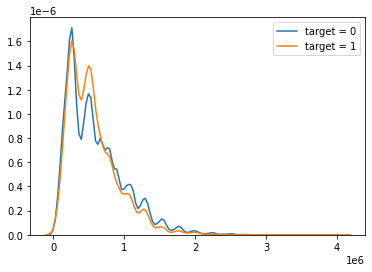

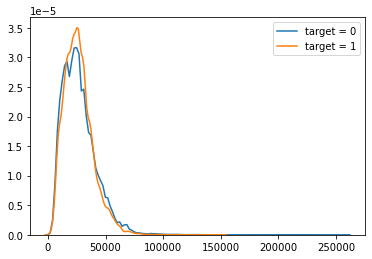

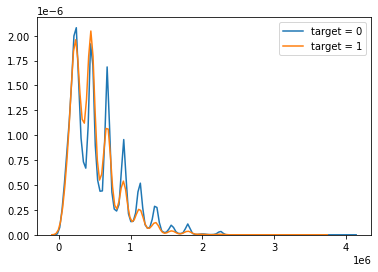

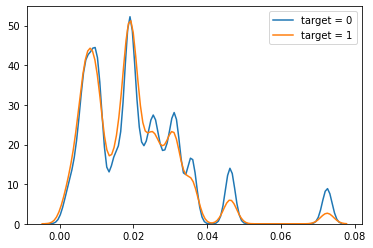

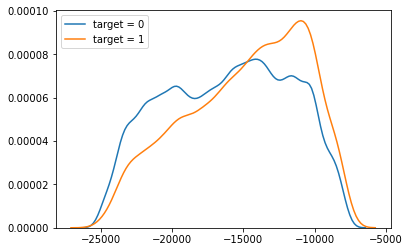

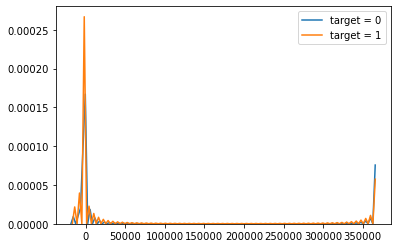

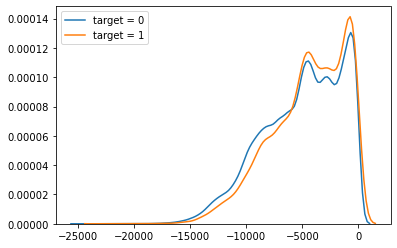

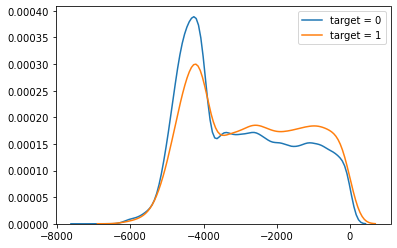

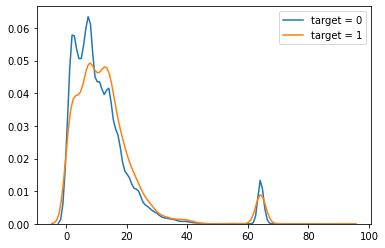

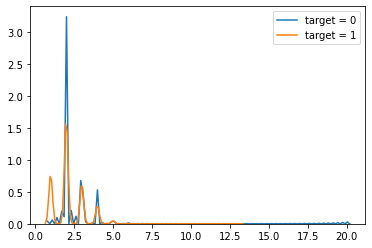

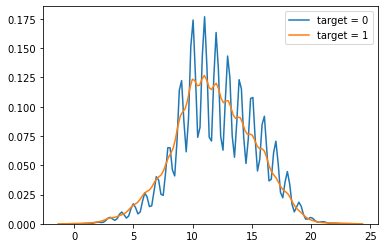

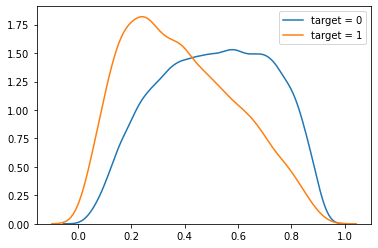

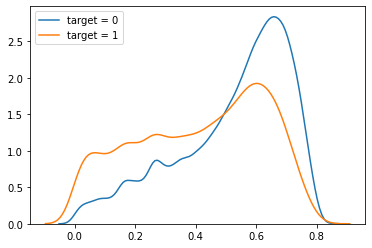

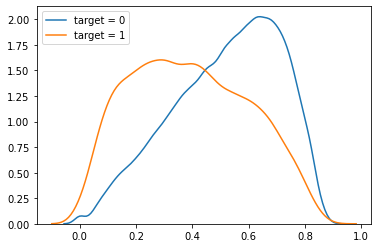

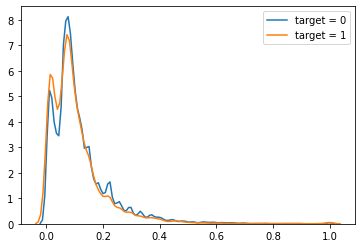

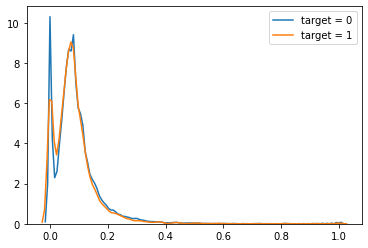

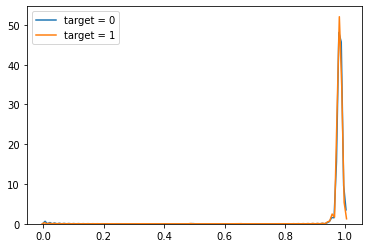

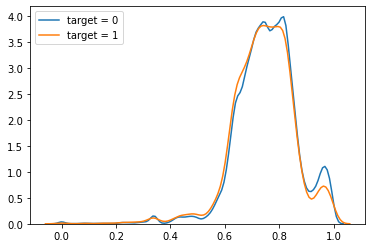

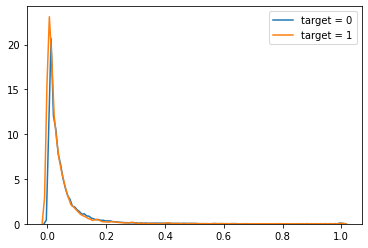

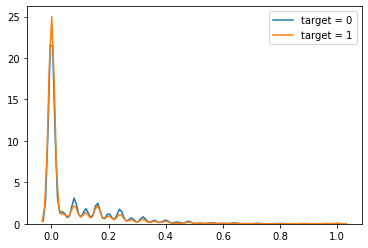

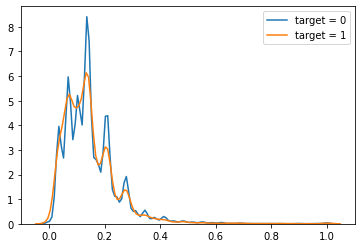

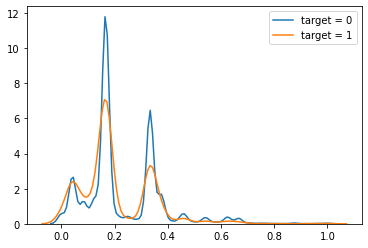

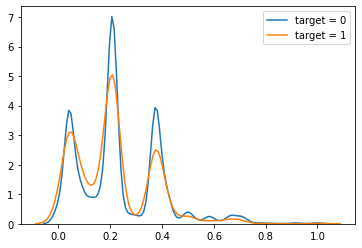

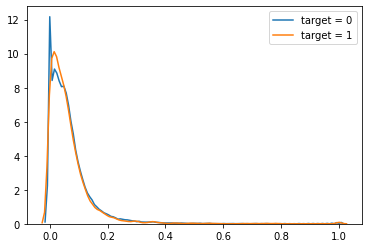

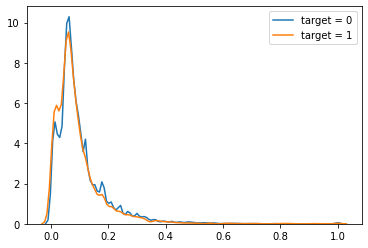

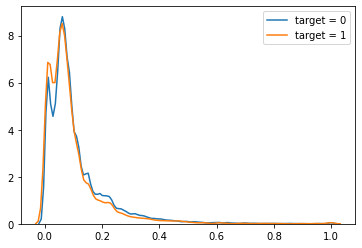

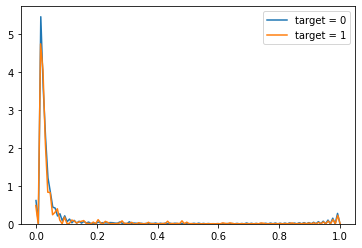

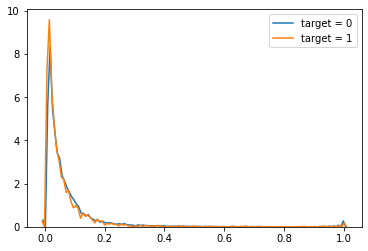

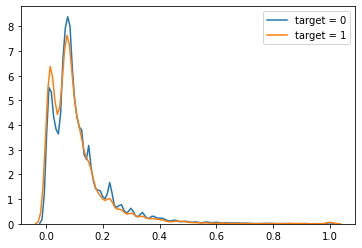

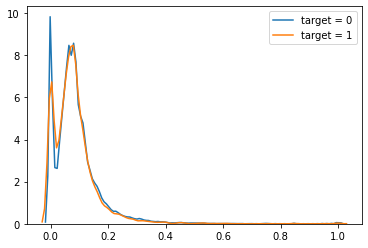

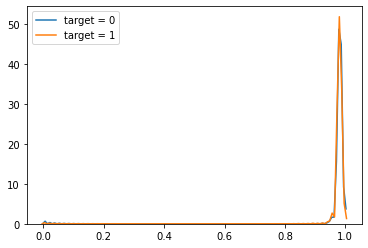

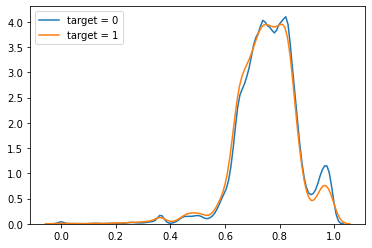

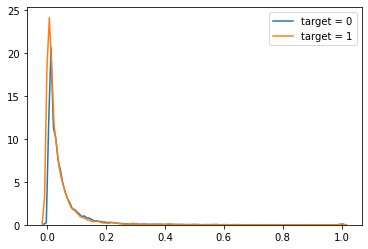

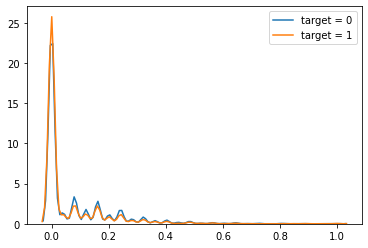

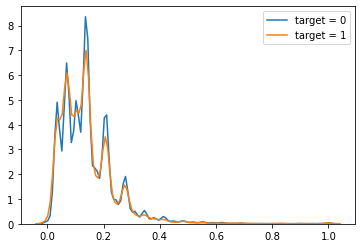

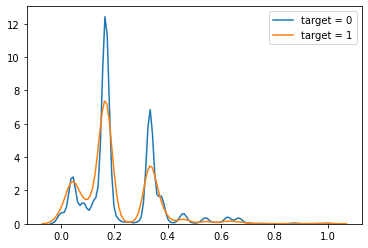

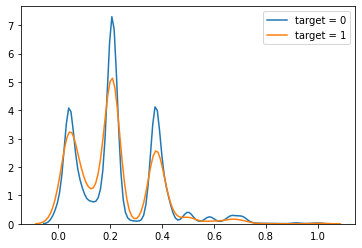

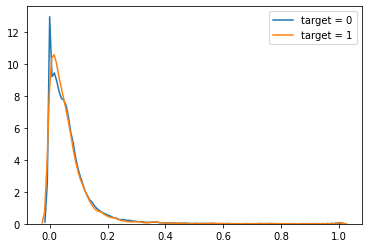

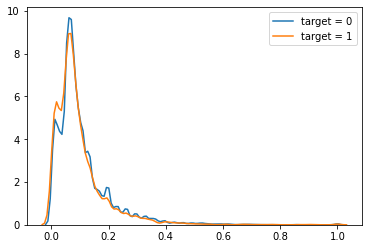

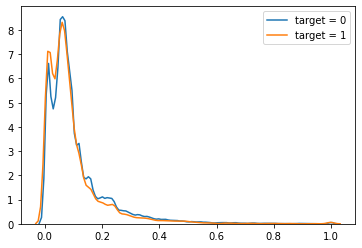

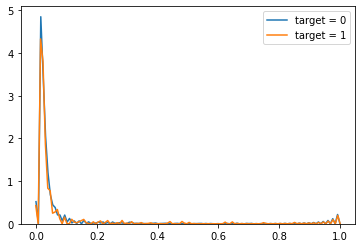

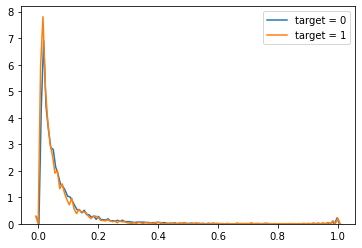

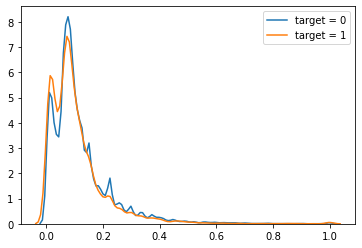

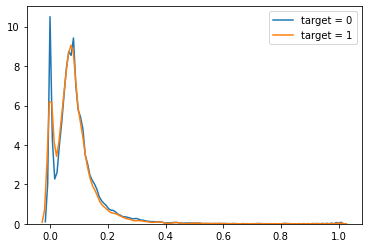

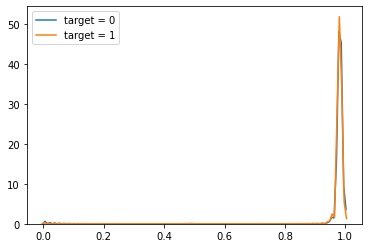

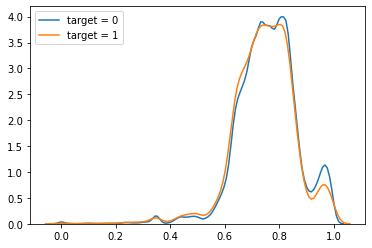

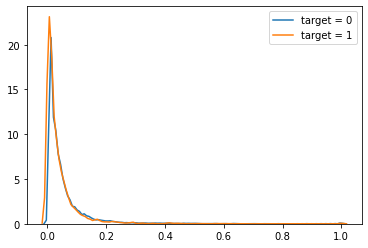

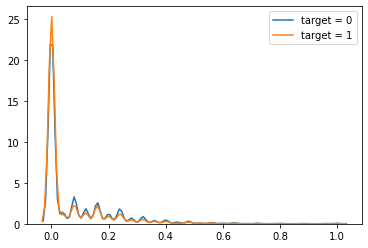

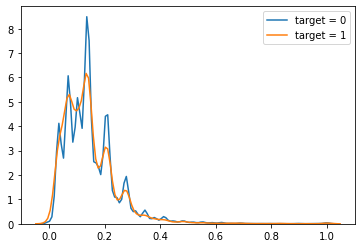

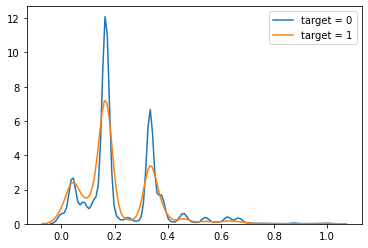

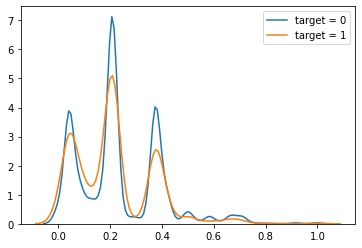

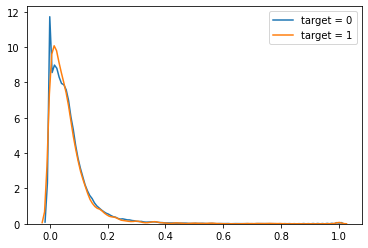

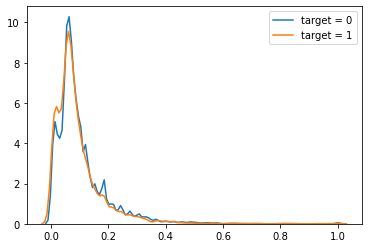

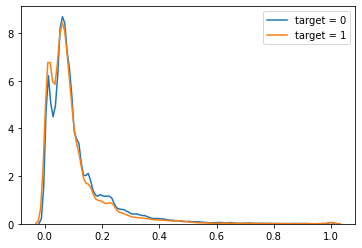

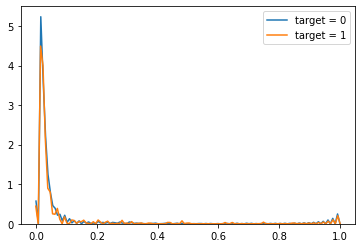

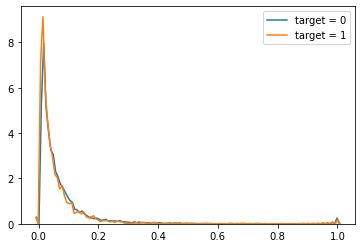

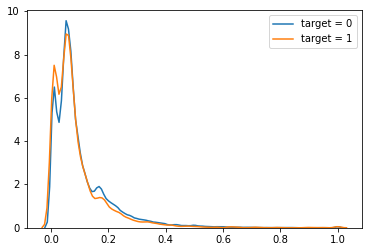

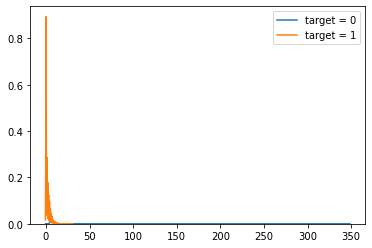

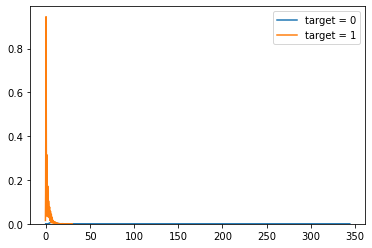

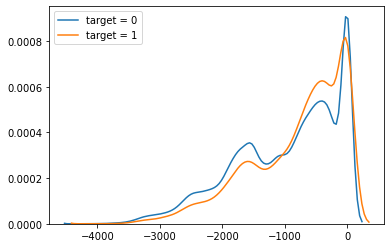

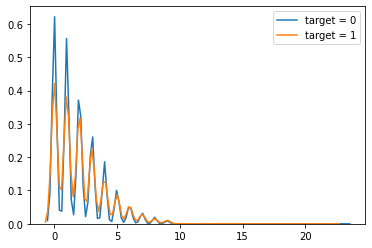

In [64]:
for i in train:
    try:
        if (len(train[i].unique())>3 and train[i].dtype != 'object'):
            sns.kdeplot(train.loc[train['TARGET'] == 0, i], label = 'target = 0')
            sns.kdeplot(train.loc[train['TARGET'] == 1, i], label = 'target = 1')
            plt.legend()
            plt.show()
    except:
        pass

In [65]:
apptrain.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     26983
AMT_REQ_CREDIT_BUREAU_WEEK    26983
AMT_REQ_CREDIT_BUREAU_MON     26983
AMT_REQ_CREDIT_BUREAU_QRT     26983
AMT_REQ_CREDIT_BUREAU_YEAR    26983
Length: 122, dtype: int64

In [66]:
apptrain_nan = {'AMT_ANNUITY': 0,
 'AMT_GOODS_PRICE': 0,
 'NAME_TYPE_SUITE': 'most',
 'OWN_CAR_AGE': -1,
 'OCCUPATION_TYPE': 'unknown',
 'CNT_FAM_MEMBERS': 1,
 'EXT_SOURCE_1': 'median',
 'EXT_SOURCE_2': 'median',
 'EXT_SOURCE_3': 'median',
 'APARTMENTS_AVG': 'median',
 'BASEMENTAREA_AVG': 'median',
 'YEARS_BEGINEXPLUATATION_AVG': 'median',
 'YEARS_BUILD_AVG': 'median',
 'COMMONAREA_AVG': 'median',
 'ELEVATORS_AVG': 'median',
 'ENTRANCES_AVG': 'median',
 'FLOORSMAX_AVG': 'median',
 'FLOORSMIN_AVG': 'median',
 'LANDAREA_AVG': 'median',
 'LIVINGAPARTMENTS_AVG': 'median',
 'LIVINGAREA_AVG': 'median',
 'NONLIVINGAPARTMENTS_AVG': 'median',
 'NONLIVINGAREA_AVG': 'median',
 'APARTMENTS_MODE': 'median',
 'BASEMENTAREA_MODE': 'median',
 'YEARS_BEGINEXPLUATATION_MODE': 'median',
 'YEARS_BUILD_MODE': 'median',
 'COMMONAREA_MODE': 'median',
 'ELEVATORS_MODE': 'median',
 'ENTRANCES_MODE': 'median',
 'FLOORSMAX_MODE': 'median',
 'FLOORSMIN_MODE': 'median',
 'LANDAREA_MODE': 'median',
 'LIVINGAPARTMENTS_MODE': 'median',
 'LIVINGAREA_MODE': 'median',
 'NONLIVINGAPARTMENTS_MODE': 'median',
 'NONLIVINGAREA_MODE': 'median',
 'APARTMENTS_MEDI': 'median',
 'BASEMENTAREA_MEDI': 'median',
 'YEARS_BEGINEXPLUATATION_MEDI': 'median',
 'YEARS_BUILD_MEDI': 'median',
 'COMMONAREA_MEDI': 'median',
 'ELEVATORS_MEDI': 'median',
 'ENTRANCES_MEDI': 'median',
 'FLOORSMAX_MEDI': 'median',
 'FLOORSMIN_MEDI': 'median',
 'LANDAREA_MEDI': 'median',
 'LIVINGAPARTMENTS_MEDI': 'median',
 'LIVINGAREA_MEDI': 'median',
 'NONLIVINGAPARTMENTS_MEDI': 'median',
 'NONLIVINGAREA_MEDI': 'median',
 'FONDKAPREMONT_MODE': 'not specified',
 'HOUSETYPE_MODE': 'unknown',
 'TOTALAREA_MODE': 'median',
 'WALLSMATERIAL_MODE': 'unknown',
 'EMERGENCYSTATE_MODE': 'No',
 'OBS_30_CNT_SOCIAL_CIRCLE': 0,
 'DEF_30_CNT_SOCIAL_CIRCLE': 0,
 'OBS_60_CNT_SOCIAL_CIRCLE': 0,
 'DEF_60_CNT_SOCIAL_CIRCLE':0,
 'AMT_REQ_CREDIT_BUREAU_HOUR': 0,
 'AMT_REQ_CREDIT_BUREAU_DAY': 0,
 'AMT_REQ_CREDIT_BUREAU_WEEK': 0,
 'AMT_REQ_CREDIT_BUREAU_MON': 0,
 'AMT_REQ_CREDIT_BUREAU_QRT': 0,
 'AMT_REQ_CREDIT_BUREAU_YEAR': 0}

In [67]:
RemoveNaN(apptrain,apptrain_nan)

==========List of Columns which has Nan entries in it===========
['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVIN

FONDKAPREMONT_MODE 136876 68.47840225733182
[nan 'reg oper account' 'org spec account' 'reg oper spec account'
 'not specified']

HOUSETYPE_MODE 100429 50.24414404498654
[nan 'block of flats' 'specific housing' 'terraced house']

TOTALAREA_MODE 96610 48.33351677489719
TOTALAREA_MODE has more than 100 unique values

WALLSMATERIAL_MODE 101759 50.9095366266097
[nan 'Panel' 'Stone, brick' 'Wooden' 'Block' 'Mixed' 'Others' 'Monolithic']

EMERGENCYSTATE_MODE 94844 47.44999549734344
[nan 'No' 'Yes']

OBS_30_CNT_SOCIAL_CIRCLE 681 0.3407010135980228
[  0.   3.   2.   1.   4.   6.   7.   5.  12.   8.  10.   9.  14.  11.
  15.  nan  16.  21.  13.  22.  17.  18.  24.  20.  19.  25.  27.  23.
  28.  26.  47. 348.  30.]

DEF_30_CNT_SOCIAL_CIRCLE 681 0.3407010135980228
[ 0.  1.  2.  8. nan  3.  4.  5.  6.  7. 34.]

OBS_60_CNT_SOCIAL_CIRCLE 681 0.3407010135980228
[  0.   3.   2.   1.   4.   6.   7.   5.  12.   8.  10.   9.  14.  15.
  11.  nan  16.  21.  13.  22.  17.  18.  24.  20.  19.  25.  27.  23

In [68]:
# plt.figure(figsize=(50,50))
# sns.heatmap(apptrain.corr().abs(),vmin=-1,cmap='coolwarm',annot=True)

In [69]:
upper = apptrain.corr().abs().where(np.triu(np.ones(apptrain.corr().shape), k=1).astype(np.bool))
apptrain_drop = [column for column in upper.columns if any(upper[column] >= 0.90)]
apptrain.drop(columns =apptrain_drop,axis=1,inplace = True)

In [70]:
# plt.figure(figsize=(50,50))
# sns.heatmap(apptrain.corr().abs(),vmin=-1,cmap='coolwarm',annot=True)

In [71]:
# plt.figure(figsize=(50,50))
# sns.heatmap(apptrain.corr().abs(),vmin=-1,cmap='coolwarm',annot=True)
apptrain_drop

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'REGION_RATING_CLIENT_W_CITY',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE']

In [72]:
# nan_data
# apptrain['EMERGENCYSTATE_MODE'].value_counts()

In [73]:
# apptrain.isna().sum()
categor_apptrain = [i for i in apptrain.columns if apptrain[i].dtypes == 'object']
categor_apptrain

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [74]:
apptrain['WALLSMATERIAL_MODE'].value_counts()

unknown         101759
Panel            42916
Stone, brick     42087
Block             6031
Wooden            3401
Mixed             1496
Monolithic        1146
Others            1046
Name: WALLSMATERIAL_MODE, dtype: int64

In [75]:
# Encoding
labelencoder = LabelEncoder()
Label_apptrain = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
         'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','EMERGENCYSTATE_MODE','NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE']
for i in Label_apptrain:
    apptrain[i] = labelencoder.fit_transform(apptrain[i])

In [76]:
# Ambigous_apptrain = ['FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE']

In [77]:
# Onehot_apptrain = ['NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE']
# apptrain = pd.get_dummies(apptrain,columns=Onehot_apptrain,drop_first=True)

## Merging apptrain and prev_app

In [78]:
# apptrain.info()
apptrain_merge = {'SK_ID_PREV': ['ignore', 0.0],
 'AMT_ANNUITY': ['mean', 0.0],
 'AMT_APPLICATION': ['mean', 0.0],
 'AMT_DOWN_PAYMENT': ['mean', 0.0],
 'HOUR_APPR_PROCESS_START': ['ignore', 0.0],
 'FLAG_LAST_APPL_PER_CONTRACT': ['sum', 0.0],
 'NFLAG_LAST_APPL_IN_DAY': ['sum', 0.0],
 'RATE_DOWN_PAYMENT': ['mean', 0.0],
 'NAME_CASH_LOAN_PURPOSE': ['mode', 0.0],
 'NAME_CONTRACT_STATUS': ['mode', 0.0],
 'DAYS_DECISION': ['min', 0.0],
 'CODE_REJECT_REASON': ['mode', 0.0],
 'NAME_CLIENT_TYPE': ['sum', 0.0],
 'NAME_GOODS_CATEGORY': ['sum', 0.0],
 'NAME_PORTFOLIO': ['sum', 0.0],
 'CHANNEL_TYPE': ['mode', 0.0],
 'SELLERPLACE_AREA': ['mode', 0.0],
 'NAME_SELLER_INDUSTRY': ['mode', 0.0],
 'CNT_PAYMENT': ['sum', 0.0],
 'PRODUCT_COMBINATION': ['mode', 0.0],
 'DAYS_FIRST_DRAWING': ['min', 0.0],
 'DAYS_FIRST_DUE': ['min', 0.0],
 'DAYS_LAST_DUE_1ST_VERSION': ['min', 0.0],
 'DAYS_LAST_DUE': ['min', 0.0],
 'NFLAG_INSURED_ON_APPROVAL': ['sum', 0.0],
 'WEEKDAY_APPR_PROCESS_START_MONDAY': ['sum', 0.0],
 'WEEKDAY_APPR_PROCESS_START_SATURDAY': ['sum', 0.0],
 'WEEKDAY_APPR_PROCESS_START_SUNDAY': ['sum', 0.0],
 'WEEKDAY_APPR_PROCESS_START_THURSDAY': ['sum', 0.0],
 'WEEKDAY_APPR_PROCESS_START_TUESDAY': ['sum', 0.0],
 'WEEKDAY_APPR_PROCESS_START_WEDNESDAY': ['sum', 0.0],
 'NAME_PAYMENT_TYPE_Cashless from the account of the employer': ['sum', 0.0],
 'NAME_PAYMENT_TYPE_Non-cash from your account': ['sum', 0.0],
 'NAME_PAYMENT_TYPE_XNA': ['sum', 0.0],
 'NAME_TYPE_SUITE_Family': ['sum', 0.0],
 'NAME_TYPE_SUITE_Group of people': ['sum', 0.0],
 'NAME_TYPE_SUITE_Other_A': ['sum', 0.0],
 'NAME_TYPE_SUITE_Other_B': ['sum', 0.0],
 'NAME_TYPE_SUITE_Spouse, partner': ['sum', 0.0],
 'NAME_TYPE_SUITE_Unaccompanied': ['sum', 0.0],
 'NAME_CONTRACT_TYPE_Consumer loans': ['sum', 0.0],
 'NAME_CONTRACT_TYPE_Revolving loans': ['sum', 0.0],
 'NAME_CONTRACT_TYPE_XNA': ['sum', 0.0],
 'NAME_PRODUCT_TYPE_walk-in': ['sum', 0.0],
 'NAME_PRODUCT_TYPE_x-sell': ['sum', 0.0],
 'NAME_YIELD_GROUP_high': ['sum', 0.0],
 'NAME_YIELD_GROUP_low_action': ['sum', 0.0],
 'NAME_YIELD_GROUP_low_normal': ['sum', 0.0],
 'NAME_YIELD_GROUP_middle': ['sum', 0.0],
 'MONTHS_BALANCE_1': ['max', 0.0],
 'CNT_INSTALMENT': ['sum', 0.0],
 'SK_DPD_1': ['sum', 0.0],
 'SK_DPD_DEF_1': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Amortized debt': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Approved_1': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Canceled': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Completed_1': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Demand_1': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Returned to the store': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Signed_1': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_XNA': ['sum', 0.0],
 'NUM_INSTALMENT_VERSION': ['mode', 0.0],
 'NUM_INSTALMENT_NUMBER': ['max', 0.0],
 'penalty_days': ['sum', 0.0],
 'penalty_amount': ['sum', 0.0],
 'MONTHS_BALANCE_2': ['max', 0.0],
 'AMT_BALANCE': ['mean', 0.0],
 'AMT_CREDIT_LIMIT_ACTUAL': ['mean', 0.0],
 'AMT_DRAWINGS_ATM_CURRENT': ['mean', 0.0],
 'AMT_DRAWINGS_CURRENT': ['mean', 0.0],
 'AMT_DRAWINGS_OTHER_CURRENT': ['mean', 0.0],
 'AMT_DRAWINGS_POS_CURRENT': ['mean', 0.0],
 'AMT_INST_MIN_REGULARITY': ['mean', 0.0],
 'AMT_PAYMENT_CURRENT': ['mean', 0.0],
 'CNT_DRAWINGS_ATM_CURRENT': ['sum', 0.0],
 'CNT_DRAWINGS_CURRENT': ['sum', 0.0],
 'CNT_DRAWINGS_OTHER_CURRENT': ['sum', 0.0],
 'CNT_INSTALMENT_MATURE_CUM': ['sum', 0.0],
 'SK_DPD_2': ['sum', 0.0],
 'SK_DPD_DEF_2': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Approved_2': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Completed_2': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Demand_2': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Refused': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Sent proposal': ['sum', 0.0],
 'NAME_CONTRACT_STATUS_Signed_2': ['sum', 0.0]}
apptrain = merge(prev_app,apptrain,'SK_ID_CURR',apptrain_merge)

SK_ID_PREV
SK_ID_CURR
AMT_ANNUITY
AMT_APPLICATION
AMT_DOWN_PAYMENT
HOUR_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NFLAG_LAST_APPL_IN_DAY
RATE_DOWN_PAYMENT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
DAYS_DECISION
CODE_REJECT_REASON
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
CHANNEL_TYPE
SELLERPLACE_AREA
NAME_SELLER_INDUSTRY
CNT_PAYMENT
PRODUCT_COMBINATION
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
NFLAG_INSURED_ON_APPROVAL
WEEKDAY_APPR_PROCESS_START_MONDAY
WEEKDAY_APPR_PROCESS_START_SATURDAY
WEEKDAY_APPR_PROCESS_START_SUNDAY
WEEKDAY_APPR_PROCESS_START_THURSDAY
WEEKDAY_APPR_PROCESS_START_TUESDAY
WEEKDAY_APPR_PROCESS_START_WEDNESDAY
NAME_PAYMENT_TYPE_Cashless from the account of the employer
NAME_PAYMENT_TYPE_Non-cash from your account
NAME_PAYMENT_TYPE_XNA
NAME_TYPE_SUITE_Family
NAME_TYPE_SUITE_Group of people
NAME_TYPE_SUITE_Other_A
NAME_TYPE_SUITE_Other_B
NAME_TYPE_SUITE_Spouse, partner
NAME_TYPE_SUITE_Unaccompanied
NAME_CONTRACT_TYPE_Consu

In [79]:
# apptrain_merge
# del prev_app
# gc.collect()

## Merging apptrain and bureau

In [80]:
bat = {'SK_ID_BUREAU': ['ignore', 0.0],
 'DAYS_CREDIT': ['min', 0.0],
 'CREDIT_DAY_OVERDUE': ['min', 0.0],
 'DAYS_CREDIT_ENDDATE': ['min', 0.0],
 'DAYS_ENDDATE_FACT': ['sum', 0.0],
 'AMT_CREDIT_MAX_OVERDUE': ['max', 0.0],
 'CNT_CREDIT_PROLONG': ['sum', 0.0],
 'AMT_CREDIT_SUM': ['mean', 0.0],
 'AMT_CREDIT_SUM_DEBT': ['mean', 0.0],
 'AMT_CREDIT_SUM_LIMIT': ['mean', 0.0],
 'AMT_CREDIT_SUM_OVERDUE': ['mean', 0.0],
 'CREDIT_TYPE': ['mode', 0.0],
 'DAYS_CREDIT_UPDATE': ['min', 0.0],
 'AMT_ANNUITY': ['mean', 0.0],
 'CREDIT_ACTIVE_Bad debt': ['sum', 0.0],
 'CREDIT_ACTIVE_Closed': ['sum', 0.0],
 'CREDIT_ACTIVE_Sold': ['sum', 0.0],
 'CREDIT_CURRENCY_currency 2': ['sum', 0.0],
 'CREDIT_CURRENCY_currency 3': ['sum', 0.0],
 'CREDIT_CURRENCY_currency 4': ['sum', 0.0],
 'MONTHS_BALANCE': ['min', 0.0],
 'STATUS_1': ['sum', 0.0],
 'STATUS_2': ['sum', 0.0],
 'STATUS_3': ['sum', 0.0],
 'STATUS_4': ['sum', 0.0],
 'STATUS_5': ['sum', 0.0],
 'STATUS_C': ['sum', 0.0],
 'STATUS_X': ['sum', 0.0]}
apptrain = merge(bureau,apptrain,'SK_ID_CURR',bat)

SK_ID_CURR
SK_ID_BUREAU
DAYS_CREDIT
CREDIT_DAY_OVERDUE
DAYS_CREDIT_ENDDATE
DAYS_ENDDATE_FACT
AMT_CREDIT_MAX_OVERDUE
CNT_CREDIT_PROLONG
AMT_CREDIT_SUM
AMT_CREDIT_SUM_DEBT
AMT_CREDIT_SUM_LIMIT
AMT_CREDIT_SUM_OVERDUE
CREDIT_TYPE
DAYS_CREDIT_UPDATE
AMT_ANNUITY
CREDIT_ACTIVE_Bad debt
CREDIT_ACTIVE_Closed
CREDIT_ACTIVE_Sold
CREDIT_CURRENCY_currency 2
CREDIT_CURRENCY_currency 3
CREDIT_CURRENCY_currency 4
MONTHS_BALANCE
STATUS_1
STATUS_2
STATUS_3
STATUS_4
STATUS_5
STATUS_C
STATUS_X


In [81]:
apptrain.shape

(199882, 200)

In [82]:
apptrain.to_csv("trainapp.csv",index=False)

### Application test nan values

In [83]:
apptest = pd.read_csv('/kaggle/input/iiitb2020-home-credit-default-risk/application_test.csv')

In [84]:
apptest = pd.read_csv('/kaggle/input/iiitb2020-home-credit-default-risk/application_test.csv')

In [85]:
apptest_nan={'AMT_ANNUITY': [0, 0], 'AMT_GOODS_PRICE': [0, 0], 'NAME_TYPE_SUITE': ['Unaccompanied', 'Unaccompanied'], 'OWN_CAR_AGE': ['-1', '-1'], 'OCCUPATION_TYPE': ['unknown', 'unknown'], 'CNT_FAM_MEMBERS': ['1', '1'], 'EXT_SOURCE_1': ['median', 0.5066961392817232], 'EXT_SOURCE_2': ['median', 0.5660097711985461], 'EXT_SOURCE_3': ['median', 0.5352762504724826], 'APARTMENTS_AVG': ['median', 0.0876], 'BASEMENTAREA_AVG': ['median', 0.0764], 'YEARS_BEGINEXPLUATATION_AVG': ['median', 0.9816], 'YEARS_BUILD_AVG': ['median', 0.7552], 'COMMONAREA_AVG': ['median', 0.0211], 'ELEVATORS_AVG': ['median', 0.0], 'ENTRANCES_AVG': ['median', 0.1379], 'FLOORSMAX_AVG': ['median', 0.1667], 'FLOORSMIN_AVG': ['median', 0.2083], 'LANDAREA_AVG': ['median', 0.0482], 'LIVINGAPARTMENTS_AVG': ['median', 0.0756], 'LIVINGAREA_AVG': ['median', 0.0746], 'NONLIVINGAPARTMENTS_AVG': ['median', 0.0], 'NONLIVINGAREA_AVG': ['median', 0.0036], 'APARTMENTS_MODE': ['median', 0.084], 'BASEMENTAREA_MODE': ['median', 0.0748], 'YEARS_BEGINEXPLUATATION_MODE': ['median', 0.9816], 'YEARS_BUILD_MODE': ['median', 0.7648], 'COMMONAREA_MODE': ['median', 0.0191], 'ELEVATORS_MODE': ['median', 0.0], 'ENTRANCES_MODE': ['median', 0.1379], 'FLOORSMAX_MODE': ['median', 0.1667], 'FLOORSMIN_MODE': ['median', 0.2083], 'LANDAREA_MODE': ['median', 0.0459], 'LIVINGAPARTMENTS_MODE': ['median', 0.0771], 'LIVINGAREA_MODE': ['median', 0.0731], 'NONLIVINGAPARTMENTS_MODE': ['median', 0.0], 'NONLIVINGAREA_MODE': ['median', 0.0011], 'APARTMENTS_MEDI': ['median', 0.0874], 'BASEMENTAREA_MEDI': ['median', 0.076], 'YEARS_BEGINEXPLUATATION_MEDI': ['median', 0.9816], 'YEARS_BUILD_MEDI': ['median', 0.7585], 'COMMONAREA_MEDI': ['median', 0.0209], 'ELEVATORS_MEDI': ['median', 0.0], 'ENTRANCES_MEDI': ['median', 0.1379], 'FLOORSMAX_MEDI': ['median', 0.1667], 'FLOORSMIN_MEDI': ['median', 0.2083], 'LANDAREA_MEDI': ['median', 0.0487], 'LIVINGAPARTMENTS_MEDI': ['median', 0.0765], 'LIVINGAREA_MEDI': ['median', 0.0749], 'NONLIVINGAPARTMENTS_MEDI': ['median', 0.0], 'NONLIVINGAREA_MEDI': ['median', 0.0031], 'FONDKAPREMONT_MODE': ['not specified', 'not specified'], 'HOUSETYPE_MODE': ['unknown', 'unknown'], 'TOTALAREA_MODE': ['median', 0.0688], 'WALLSMATERIAL_MODE': ['unknown', 'unknown'], 'EMERGENCYSTATE_MODE': ['No', 'No'], 'OBS_30_CNT_SOCIAL_CIRCLE': [0,0], 'DEF_30_CNT_SOCIAL_CIRCLE': [0,0], 'OBS_60_CNT_SOCIAL_CIRCLE': [0,0], 'DEF_60_CNT_SOCIAL_CIRCLE': [0,0],'DAYS_LAST_PHONE_CHANGE':[0,0], 'AMT_REQ_CREDIT_BUREAU_HOUR': [0,0], 'AMT_REQ_CREDIT_BUREAU_DAY': [0,0], 'AMT_REQ_CREDIT_BUREAU_WEEK': [0,0], 'AMT_REQ_CREDIT_BUREAU_MON': [0,0], 'AMT_REQ_CREDIT_BUREAU_QRT': [0,0], 'AMT_REQ_CREDIT_BUREAU_YEAR': [0,0]}

In [86]:
RemoveNaN(apptest,apptest_nan)

==========List of Columns which has Nan entries in it===========
['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVIN

WALLSMATERIAL_MODE 54582 50.71309777104683
[nan 'Block' 'Panel' 'Stone, brick' 'Others' 'Mixed' 'Monolithic' 'Wooden']

EMERGENCYSTATE_MODE 50911 47.30230699904301
[nan 'No' 'Yes']

OBS_30_CNT_SOCIAL_CIRCLE 340 0.3158999897797062
[ 0.  6.  4.  2.  7.  8. 12.  1.  5.  9.  3. 10. 22. 11. nan 16. 13. 14.
 21. 15. 23. 25. 19. 24. 20. 17. 18. 27. 26. 30. 29.]

DEF_30_CNT_SOCIAL_CIRCLE 340 0.3158999897797062
[ 0.  3.  1.  2. nan  4.  5.  6.]

OBS_60_CNT_SOCIAL_CIRCLE 340 0.3158999897797062
[ 0.  6.  4.  2.  7.  8. 12.  1.  5.  9.  3. 10. 22. 11. nan 16. 13. 14.
 21. 15. 23. 24. 18. 19. 20. 17. 25. 27. 30. 29.]

DEF_60_CNT_SOCIAL_CIRCLE 340 0.3158999897797062
[ 0.  3.  1.  2. nan  4.  5.]

DAYS_LAST_PHONE_CHANGE 1 0.0009291176169991358
DAYS_LAST_PHONE_CHANGE has more than 100 unique values

AMT_REQ_CREDIT_BUREAU_HOUR 14536 13.505653680699439
[ 0. nan  1.  2.  3.  4.]

AMT_REQ_CREDIT_BUREAU_DAY 14536 13.505653680699439
[ 0. nan  1.  2.  3.  6.  5.  4.  8.]

AMT_REQ_CREDIT_BUREAU_WEEK 14536 13.

In [87]:
# drop code
upper = apptest.corr().abs().where(np.triu(np.ones(apptest.corr().shape), k=1).astype(np.bool))
apptest_drop = [column for column in upper.columns if any(upper[column] >= 0.90)]
apptest.drop(columns =apptest_drop,axis=1,inplace = True)

In [88]:
# encode
categor_apptest = [i for i in apptest.columns if apptest[i].dtypes == 'object']
categor_apptest

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [89]:
labelencoder = LabelEncoder()
Label_apptest = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
         'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','ORGANIZATION_TYPE','EMERGENCYSTATE_MODE','NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE']
for i in Label_apptest:
    apptest[i] = labelencoder.fit_transform(apptest[i])

In [90]:
# Ambigous_apptest = []

In [91]:
# Onehot_test = ['NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE']
# apptest = pd.get_dummies(apptest,columns=Onehot_test,drop_first=True)

## Merging apptest and prev_app

In [92]:
apptest = merge(prev_app,apptest,'SK_ID_CURR',apptrain_merge)

SK_ID_PREV
SK_ID_CURR
AMT_ANNUITY
AMT_APPLICATION
AMT_DOWN_PAYMENT
HOUR_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NFLAG_LAST_APPL_IN_DAY
RATE_DOWN_PAYMENT
NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
DAYS_DECISION
CODE_REJECT_REASON
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
CHANNEL_TYPE
SELLERPLACE_AREA
NAME_SELLER_INDUSTRY
CNT_PAYMENT
PRODUCT_COMBINATION
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
NFLAG_INSURED_ON_APPROVAL
WEEKDAY_APPR_PROCESS_START_MONDAY
WEEKDAY_APPR_PROCESS_START_SATURDAY
WEEKDAY_APPR_PROCESS_START_SUNDAY
WEEKDAY_APPR_PROCESS_START_THURSDAY
WEEKDAY_APPR_PROCESS_START_TUESDAY
WEEKDAY_APPR_PROCESS_START_WEDNESDAY
NAME_PAYMENT_TYPE_Cashless from the account of the employer
NAME_PAYMENT_TYPE_Non-cash from your account
NAME_PAYMENT_TYPE_XNA
NAME_TYPE_SUITE_Family
NAME_TYPE_SUITE_Group of people
NAME_TYPE_SUITE_Other_A
NAME_TYPE_SUITE_Other_B
NAME_TYPE_SUITE_Spouse, partner
NAME_TYPE_SUITE_Unaccompanied
NAME_CONTRACT_TYPE_Consu

## Merging apptest and bureau

In [93]:
apptest = merge(bureau,apptest,'SK_ID_CURR',bat)

SK_ID_CURR
SK_ID_BUREAU
DAYS_CREDIT
CREDIT_DAY_OVERDUE
DAYS_CREDIT_ENDDATE
DAYS_ENDDATE_FACT
AMT_CREDIT_MAX_OVERDUE
CNT_CREDIT_PROLONG
AMT_CREDIT_SUM
AMT_CREDIT_SUM_DEBT
AMT_CREDIT_SUM_LIMIT
AMT_CREDIT_SUM_OVERDUE
CREDIT_TYPE
DAYS_CREDIT_UPDATE
AMT_ANNUITY
CREDIT_ACTIVE_Bad debt
CREDIT_ACTIVE_Closed
CREDIT_ACTIVE_Sold
CREDIT_CURRENCY_currency 2
CREDIT_CURRENCY_currency 3
CREDIT_CURRENCY_currency 4
MONTHS_BALANCE
STATUS_1
STATUS_2
STATUS_3
STATUS_4
STATUS_5
STATUS_C
STATUS_X


In [94]:
del prev_app
del bureau
gc.collect()

20

In [95]:
apptest.to_csv("testapp.csv",index=False)

## Final Data Cleaning

In [96]:
X = apptrain.drop(columns=['SK_ID_CURR'])
Y = apptest.drop(columns=['SK_ID_CURR'])
y=X['TARGET']
X=X.drop(columns =['TARGET'])

##### Creating new features by taking ratio of different combination of these features 

In [97]:
ratio=['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY_1',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'AMT_ANNUITY_2',
 'AMT_APPLICATION',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'DAYS_CREDIT',
 'AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_DEBT']

In [98]:
for i in ratio:
    for j in ratio:
        if(i!=j):
            X[i+'by'+j]=X[i]/X[j]
            Y[i+'by'+j]=Y[i]/Y[j]

In [99]:
X = X.fillna(0)
Y = Y.fillna(0)

In [100]:
col = list(X.columns[X.max()>1e10])
col1= list(X.columns[X.min()<-1e10])

In [101]:
for i in col1:
    if(i not in col):
        col.append(i)
col.append('AMT_CREDIT_SUM_DEBTbyDAYS_CREDIT')

In [102]:
X.drop(columns =col,axis=1,inplace = True)
Y.drop(columns =col,axis=1,inplace = True)

##### OUTLIERS

In [103]:
def getrange(x):
    q1 = x.quantile(q=0.25)
    q3 = x.quantile(q=0.75)
    iqr = q3 - q1
    outlier_range = iqr*1.5
    lower_bound = q1 - outlier_range
    upper_bound = q3 + outlier_range
    return lower_bound,upper_bound

In [104]:
pd.set_option('mode.chained_assignment', None)

for i in X:
    if(X[i].max()>2 and not X[i].median()==0):
        minv,maxv=getrange(X[i])
        X[i].loc[X[i] > maxv]  = maxv
        X[i].loc[X[i] < minv]  = minv


##### Some more features

In [105]:
X['DAYS_BIRTH']=X['DAYS_BIRTH']/-365
Y['DAYS_BIRTH']=Y['DAYS_BIRTH']/-365

##### Scaling

In [106]:
from sklearn.preprocessing import StandardScaler
for i in X:
    if X[i].max()>3 or X[i].min()<-3:
        print(i)
        scaler = StandardScaler()
        X[[i]]= scaler.fit_transform(X[[i]])
        Y[[i]]= scaler.transform(Y[[i]])

CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY_1
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
OCCUPATION_TYPE
CNT_FAM_MEMBERS
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
ORGANIZATION_TYPE
WALLSMATERIAL_MODE
OBS_30_CNT_SOCIAL_CIRCLE
DEF_30_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
DAYS_LAST_PHONE_CHANGE
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR
AMT_ANNUITY_2
AMT_APPLICATION
AMT_DOWN_PAYMENT
FLAG_LAST_APPL_PER_CONTRACT
NFLAG_LAST_APPL_IN_DAY
NAME_CASH_LOAN_PURPOSE
DAYS_DECISION
CODE_REJECT_REASON
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
CHANNEL_TYPE
SELLERPLACE_AREA
NAME_SELLER_INDUSTRY
CNT_PAYMENT
PRODUCT_COMBINATION
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
NFLAG_INSURED_ON_APPROVAL
WEEKDAY_APPR_PROCESS_START_MONDAY
WEEKDAY_APPR_PROCESS_START_SA

##### Removing highly correlated columns 

In [107]:
upper = X.corr().abs().where(np.triu(np.ones(X.corr().shape), k=1).astype(np.bool))
to_drop_X = [column for column in upper.columns if any(upper[column] >= 0.90)]
X.drop(columns =to_drop_X,axis=1,inplace = True)
Y.drop(columns =to_drop_X,axis=1,inplace = True)

##### New polynomial features

In [108]:
col=['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH']
for i in col:
    X[i+'_squared']=X[i]**2
    Y[i+'_squared']=Y[i]**2
    X[i+'_cubed']=X[i]**3
    Y[i+'_cubed']=Y[i]**3

##### Removing columns with very less correlation with TARGET

In [109]:
X['TARGET']=y
c=X.corr()['TARGET']

In [110]:
todrop=[]
for i in X:
    if(not (c[i]>0.005 or c[i]<-0.005)):
        todrop.append(i)
X.drop(columns =todrop,axis=1,inplace = True)
Y.drop(columns =todrop,axis=1,inplace = True)

In [111]:
X_train = X.drop(columns =['TARGET'])
X_test = Y

## MODEL

### LightGBM


In [112]:
# USED TO FIND BEST PARAMETERS
# from optuna.integration.lightgbm import LightGBMTunerCV
# train_file = Dataset(X_train, label=y,free_raw_data=False)
# params = {
#         "objective": "binary",
#         "metric": "binary_logloss",
#         "verbosity": -1,
#         "boosting_type": "gbdt",
#     }

# tuner = LightGBMTunerCV(
#         params, train_file, early_stopping_rounds=100, folds=KFold(n_splits=5)
#     )

# tuner.run()
    
# print("Best score:", tuner.best_score)
# best_params = tuner.best_params
# print("Best params:", best_params)
# print("  Params: ")
# for key, value in best_params.items():
#     print("    {}: {}".format(key, value))

In [113]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

In [114]:

model_lgbm = LGBMClassifier(verbosity = -1,
         feature_pre_filter = False,
         lambda_l1= 0.0007099817067951657,
         lambda_l2= 2.2721620492879536e-07,
         num_leaves= 64,
         feature_fraction= 0.4,
         bagging_fraction= 0.9938087600649544,
         bagging_freq= 1,
         min_child_samples= 20,
         learning_rate= 0.01,
         n_estimators= 1000,
         class_weight= 'balanced')
model_lgbm.fit(X_train, y)

LGBMClassifier(bagging_fraction=0.9938087600649544, bagging_freq=1,
               class_weight='balanced', feature_fraction=0.4,
               feature_pre_filter=False, lambda_l1=0.0007099817067951657,
               lambda_l2=2.2721620492879536e-07, learning_rate=0.01,
               n_estimators=1000, num_leaves=64, verbosity=-1)

In [115]:
y_score=model_lgbm.predict_proba(X_test)

In [116]:
y_lgbm=[]
for i in y_score:
    y_lgbm.append(i[1]) 

### XGBoost

In [117]:
model_xgb = XGBClassifier(n_estimators= 1000,learning_rate= 0.01,scale_pos_weight=2)
model_xgb.fit(X_train, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=2, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [118]:
y_score=model_xgb.predict_proba(X_test)

In [119]:
y_xgb=[]
for i in y_score:
    y_xgb.append(i[1]) 

### Catboost

In [120]:
model_cb = CatBoostClassifier(thread_count=-1,learning_rate=0.1,l2_leaf_reg=250,border_count=100,scale_pos_weight=3)
model_cb.fit(X_train, y)

0:	learn: 0.6454284	total: 202ms	remaining: 3m 22s
1:	learn: 0.6084119	total: 323ms	remaining: 2m 41s
2:	learn: 0.5779849	total: 447ms	remaining: 2m 28s
3:	learn: 0.5552796	total: 557ms	remaining: 2m 18s
4:	learn: 0.5357942	total: 692ms	remaining: 2m 17s
5:	learn: 0.5206913	total: 816ms	remaining: 2m 15s
6:	learn: 0.5086850	total: 942ms	remaining: 2m 13s
7:	learn: 0.4990273	total: 1.07s	remaining: 2m 12s
8:	learn: 0.4909103	total: 1.21s	remaining: 2m 13s
9:	learn: 0.4841689	total: 1.34s	remaining: 2m 12s
10:	learn: 0.4790937	total: 1.46s	remaining: 2m 11s
11:	learn: 0.4747625	total: 1.58s	remaining: 2m 10s
12:	learn: 0.4712929	total: 1.7s	remaining: 2m 8s
13:	learn: 0.4677930	total: 1.84s	remaining: 2m 9s
14:	learn: 0.4648168	total: 1.96s	remaining: 2m 9s
15:	learn: 0.4621948	total: 2.09s	remaining: 2m 8s
16:	learn: 0.4601557	total: 2.21s	remaining: 2m 7s
17:	learn: 0.4585222	total: 2.33s	remaining: 2m 6s
18:	learn: 0.4568751	total: 2.45s	remaining: 2m 6s
19:	learn: 0.4554814	total: 2.

159:	learn: 0.4208002	total: 20.2s	remaining: 1m 46s
160:	learn: 0.4206584	total: 20.3s	remaining: 1m 45s
161:	learn: 0.4205204	total: 20.5s	remaining: 1m 45s
162:	learn: 0.4205117	total: 20.6s	remaining: 1m 45s
163:	learn: 0.4203903	total: 20.7s	remaining: 1m 45s
164:	learn: 0.4202670	total: 20.8s	remaining: 1m 45s
165:	learn: 0.4201455	total: 20.9s	remaining: 1m 45s
166:	learn: 0.4201380	total: 21s	remaining: 1m 44s
167:	learn: 0.4200097	total: 21.2s	remaining: 1m 44s
168:	learn: 0.4199099	total: 21.3s	remaining: 1m 44s
169:	learn: 0.4197693	total: 21.5s	remaining: 1m 45s
170:	learn: 0.4196558	total: 21.6s	remaining: 1m 44s
171:	learn: 0.4195330	total: 21.8s	remaining: 1m 44s
172:	learn: 0.4194039	total: 21.9s	remaining: 1m 44s
173:	learn: 0.4192765	total: 22.1s	remaining: 1m 44s
174:	learn: 0.4192694	total: 22.2s	remaining: 1m 44s
175:	learn: 0.4191185	total: 22.3s	remaining: 1m 44s
176:	learn: 0.4189856	total: 22.4s	remaining: 1m 44s
177:	learn: 0.4189793	total: 22.5s	remaining: 1m

316:	learn: 0.4072544	total: 38.9s	remaining: 1m 23s
317:	learn: 0.4072514	total: 39s	remaining: 1m 23s
318:	learn: 0.4071460	total: 39.2s	remaining: 1m 23s
319:	learn: 0.4070549	total: 39.3s	remaining: 1m 23s
320:	learn: 0.4070528	total: 39.4s	remaining: 1m 23s
321:	learn: 0.4070322	total: 39.5s	remaining: 1m 23s
322:	learn: 0.4070258	total: 39.6s	remaining: 1m 22s
323:	learn: 0.4069204	total: 39.7s	remaining: 1m 22s
324:	learn: 0.4069170	total: 39.8s	remaining: 1m 22s
325:	learn: 0.4068530	total: 39.9s	remaining: 1m 22s
326:	learn: 0.4067290	total: 40s	remaining: 1m 22s
327:	learn: 0.4066350	total: 40.2s	remaining: 1m 22s
328:	learn: 0.4065304	total: 40.3s	remaining: 1m 22s
329:	learn: 0.4064056	total: 40.4s	remaining: 1m 22s
330:	learn: 0.4063131	total: 40.5s	remaining: 1m 21s
331:	learn: 0.4062061	total: 40.6s	remaining: 1m 21s
332:	learn: 0.4061977	total: 40.7s	remaining: 1m 21s
333:	learn: 0.4060901	total: 40.9s	remaining: 1m 21s
334:	learn: 0.4059827	total: 41s	remaining: 1m 21s

473:	learn: 0.3973760	total: 57.1s	remaining: 1m 3s
474:	learn: 0.3973212	total: 57.2s	remaining: 1m 3s
475:	learn: 0.3972628	total: 57.3s	remaining: 1m 3s
476:	learn: 0.3971722	total: 57.4s	remaining: 1m 2s
477:	learn: 0.3971677	total: 57.5s	remaining: 1m 2s
478:	learn: 0.3971194	total: 57.7s	remaining: 1m 2s
479:	learn: 0.3970267	total: 57.8s	remaining: 1m 2s
480:	learn: 0.3969713	total: 57.9s	remaining: 1m 2s
481:	learn: 0.3968988	total: 58s	remaining: 1m 2s
482:	learn: 0.3968880	total: 58.1s	remaining: 1m 2s
483:	learn: 0.3967866	total: 58.2s	remaining: 1m 2s
484:	learn: 0.3967171	total: 58.4s	remaining: 1m 1s
485:	learn: 0.3967144	total: 58.5s	remaining: 1m 1s
486:	learn: 0.3966045	total: 58.6s	remaining: 1m 1s
487:	learn: 0.3965894	total: 58.7s	remaining: 1m 1s
488:	learn: 0.3965829	total: 58.8s	remaining: 1m 1s
489:	learn: 0.3964661	total: 58.9s	remaining: 1m 1s
490:	learn: 0.3963574	total: 59.1s	remaining: 1m 1s
491:	learn: 0.3962494	total: 59.2s	remaining: 1m 1s
492:	learn: 0.

632:	learn: 0.3883012	total: 1m 15s	remaining: 43.8s
633:	learn: 0.3882857	total: 1m 15s	remaining: 43.7s
634:	learn: 0.3882319	total: 1m 15s	remaining: 43.6s
635:	learn: 0.3882318	total: 1m 16s	remaining: 43.5s
636:	learn: 0.3881607	total: 1m 16s	remaining: 43.4s
637:	learn: 0.3881012	total: 1m 16s	remaining: 43.3s
638:	learn: 0.3880175	total: 1m 16s	remaining: 43.2s
639:	learn: 0.3879232	total: 1m 16s	remaining: 43.1s
640:	learn: 0.3878213	total: 1m 16s	remaining: 43s
641:	learn: 0.3877281	total: 1m 16s	remaining: 42.9s
642:	learn: 0.3876333	total: 1m 17s	remaining: 42.8s
643:	learn: 0.3875472	total: 1m 17s	remaining: 42.7s
644:	learn: 0.3874370	total: 1m 17s	remaining: 42.6s
645:	learn: 0.3874196	total: 1m 17s	remaining: 42.4s
646:	learn: 0.3873575	total: 1m 17s	remaining: 42.3s
647:	learn: 0.3872886	total: 1m 17s	remaining: 42.2s
648:	learn: 0.3872358	total: 1m 17s	remaining: 42.1s
649:	learn: 0.3872343	total: 1m 17s	remaining: 42s
650:	learn: 0.3872208	total: 1m 18s	remaining: 41.

788:	learn: 0.3802194	total: 1m 34s	remaining: 25.3s
789:	learn: 0.3800893	total: 1m 34s	remaining: 25.1s
790:	learn: 0.3800370	total: 1m 34s	remaining: 25s
791:	learn: 0.3800343	total: 1m 34s	remaining: 24.9s
792:	learn: 0.3799652	total: 1m 34s	remaining: 24.8s
793:	learn: 0.3799640	total: 1m 35s	remaining: 24.7s
794:	learn: 0.3799422	total: 1m 35s	remaining: 24.5s
795:	learn: 0.3798764	total: 1m 35s	remaining: 24.4s
796:	learn: 0.3798752	total: 1m 35s	remaining: 24.3s
797:	learn: 0.3797926	total: 1m 35s	remaining: 24.2s
798:	learn: 0.3797466	total: 1m 35s	remaining: 24.1s
799:	learn: 0.3796966	total: 1m 35s	remaining: 23.9s
800:	learn: 0.3796712	total: 1m 35s	remaining: 23.8s
801:	learn: 0.3795853	total: 1m 35s	remaining: 23.7s
802:	learn: 0.3795191	total: 1m 36s	remaining: 23.6s
803:	learn: 0.3794791	total: 1m 36s	remaining: 23.4s
804:	learn: 0.3794752	total: 1m 36s	remaining: 23.3s
805:	learn: 0.3793751	total: 1m 36s	remaining: 23.2s
806:	learn: 0.3793483	total: 1m 36s	remaining: 2

944:	learn: 0.3720589	total: 1m 52s	remaining: 6.55s
945:	learn: 0.3720542	total: 1m 52s	remaining: 6.43s
946:	learn: 0.3719909	total: 1m 52s	remaining: 6.31s
947:	learn: 0.3719564	total: 1m 52s	remaining: 6.19s
948:	learn: 0.3719558	total: 1m 52s	remaining: 6.07s
949:	learn: 0.3718901	total: 1m 53s	remaining: 5.95s
950:	learn: 0.3718372	total: 1m 53s	remaining: 5.83s
951:	learn: 0.3717841	total: 1m 53s	remaining: 5.71s
952:	learn: 0.3717294	total: 1m 53s	remaining: 5.59s
953:	learn: 0.3716551	total: 1m 53s	remaining: 5.47s
954:	learn: 0.3715835	total: 1m 53s	remaining: 5.36s
955:	learn: 0.3715259	total: 1m 53s	remaining: 5.24s
956:	learn: 0.3714705	total: 1m 53s	remaining: 5.12s
957:	learn: 0.3714195	total: 1m 54s	remaining: 5s
958:	learn: 0.3713989	total: 1m 54s	remaining: 4.88s
959:	learn: 0.3713936	total: 1m 54s	remaining: 4.76s
960:	learn: 0.3713152	total: 1m 54s	remaining: 4.65s
961:	learn: 0.3712413	total: 1m 54s	remaining: 4.53s
962:	learn: 0.3711586	total: 1m 54s	remaining: 4.

In [121]:
y_score=model_cb.predict_proba(X_test)

In [122]:
y_cb=[]
for i in y_score:
    y_cb.append(i[1]) 

### Gradient Boosting

In [123]:
model_gb = GradientBoostingClassifier(random_state=0,learning_rate= 0.01,n_estimators= 1000,max_depth=6)
model_gb.fit(X_train, y)

In [124]:
y_score=model_gb.predict_proba(X_test)

In [126]:
y_gb=[]
for i in y_score:
    y_gb.append(i) 

## Ensemble (Weighted Average)

In [128]:
y_final = np.zeros(len(y_gb))
for i in range(len(y_gb)):
    y_final[i] = y_xgb[i]*0.1 + y_lgbm[i]*0.2 + y_gb[i]*0.3 + y_cb[i]*0.4

In [129]:
apptest['TARGET']=y_final
apptest[['SK_ID_CURR', 'TARGET']].to_csv('Submission2.csv', index= False)